In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# radar chart
import plotly.express as px

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Loading the data

In [3]:
V2_df = pd.read_csv('Student_confinement_survey.csv') 

In [4]:
#change the colone name
new_col = ['time','gender','location','university','year of study','year of program','major','origin','sheltering place','stringency','dramatic change','A1','A2','A3','A4','A5','A6','AS','S1','S2','S3','S4','S5','S6','SS','P1','P2','P3','P4','P5','P6','PS','H1','H2','H3','H4','H5','H6','HS','A','P','H','S','experience quarantine','effect quarantine','comment','agree']
V2_df.columns = new_col


In [5]:
V2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 47 columns):
time                     688 non-null object
gender                   688 non-null object
location                 688 non-null object
university               688 non-null object
year of study            688 non-null object
year of program          688 non-null object
major                    688 non-null object
origin                   688 non-null object
sheltering place         688 non-null object
stringency               688 non-null int64
dramatic change          688 non-null object
A1                       652 non-null object
A2                       685 non-null object
A3                       679 non-null object
A4                       681 non-null object
A5                       629 non-null object
A6                       676 non-null object
AS                       688 non-null object
S1                       680 non-null object
S2                       679 non-null obj

In [6]:
V2_df.shape

(688, 47)

In [7]:
V2_df.head(3)

,time,gender,location,university,year of study,year of program,major,origin,sheltering place,stringency,...,H6,HS,A,P,H,S,experience quarantine,effect quarantine,comment,agree
0,2020-6-11 上午10:31:11,Male,France,Paris-Saclay,2nd,"Yes, I am in the last year of my program","Computer Science, computer engineering",Same country as university,Primary residence or your family place (if dif...,5,...,Neutral,"Learning something new, Finishing to a lesson ...",Better,Much Worse,Neutral,Much Worse,2,5,sports,I agree.
1,2020-6-11 上午10:36:59,Male,France,Paris-Saclay,2nd,"No, I am in the middle of the program","Computer Science, computer engineering",Same country as university,University lodging or temporary lodging near t...,5,...,Better,"Learning something new, Chatting, video-confer...",Better,Worse,Neutral,Worse,4,5,Visiting my companion,I agree.
2,2020-6-11 上午10:46:53,Male,France,Paris-Saclay,3rd,"Yes, I am in the last year of my program","Computer Science, computer engineering",Other,Primary residence or your family place (if dif...,4,...,Much Worse,"Learning something new, Finishing to a lesson ...",Worse,Much Worse,Worse,Much Worse,2,5,working in the office,I agree.


* change the option to numeric


In [8]:
V2_df = V2_df.replace(['Much Better', 'Better', 'Neutral', 'Worse', 'Much Worse'], [5,4,3,2,1])

In [9]:
V2_df['year of study'] = V2_df['year of study'].apply(lambda x:x[:1]).apply(pd.to_numeric)


In [10]:
V2_df.head(3)

,time,gender,location,university,year of study,year of program,major,origin,sheltering place,stringency,...,H6,HS,A,P,H,S,experience quarantine,effect quarantine,comment,agree
0,2020-6-11 上午10:31:11,Male,France,Paris-Saclay,2,"Yes, I am in the last year of my program","Computer Science, computer engineering",Same country as university,Primary residence or your family place (if dif...,5,...,3.0,"Learning something new, Finishing to a lesson ...",4,1,3,1,2,5,sports,I agree.
1,2020-6-11 上午10:36:59,Male,France,Paris-Saclay,2,"No, I am in the middle of the program","Computer Science, computer engineering",Same country as university,University lodging or temporary lodging near t...,5,...,4.0,"Learning something new, Chatting, video-confer...",4,2,3,2,4,5,Visiting my companion,I agree.
2,2020-6-11 上午10:46:53,Male,France,Paris-Saclay,3,"Yes, I am in the last year of my program","Computer Science, computer engineering",Other,Primary residence or your family place (if dif...,4,...,1.0,"Learning something new, Finishing to a lesson ...",2,1,2,1,2,5,working in the office,I agree.


* unify the university name


In [11]:
pd.set_option('display.max_rows', None)

In [12]:
V2_df['university'].value_counts()

Paris-Saclay                                                                                                           475
Barcelona                                                                                                               24
CentraleSupélec                                                                                                         14
Nice Cote d'Azur                                                                                                        10
KTH Royal Institute of Technology                                                                                       10
CentraleSupelec                                                                                                         10
INAOE                                                                                                                    9
Politecnico di Milano                                                                                                    8
KTH             

In [13]:
#paris sud and paris sacaly
V2_df.loc[V2_df['university'].str.contains('Paris|Eit|Central'), 'university'] = 'Saclay'

#barcelona
V2_df.loc[V2_df['university'].str.contains('Barcelona'), 'university'] = 'Barcelona'

#INAOE
V2_df.loc[V2_df['university'].str.contains('INAOE|Astrophysic|Astrofísica|Astrofisica'), 'university'] = 'INAOE'

#alicante
V2_df.loc[V2_df['university'].str.contains('Alicante'), 'university'] = 'Alicante'

#nice
V2_df.loc[V2_df['university'].str.contains('Nice'), 'university'] = 'Nice'

#Berkeley
V2_df.loc[V2_df['university'].str.contains('Berkeley'), 'university'] = 'Berkeley'

#Grenoble-Alpes
V2_df.loc[V2_df['university'].str.contains('Grenoble'), 'university'] = 'Grenoble'

#Sorbonne
V2_df.loc[V2_df['university'].str.contains('Sorbonne'), 'university'] = 'Sorbonne'

#Lyon
V2_df.loc[V2_df['university'].str.contains('Lyon'), 'university'] = 'Lyon'

#Polytechnique
V2_df.loc[V2_df['university'].str.contains('Polytechnique|X'), 'university'] = 'polytecnique'

#ENSIIE
V2_df.loc[V2_df['university'].str.contains('ensiie'), 'university'] = 'ENSIIE'

#Portland
V2_df.loc[V2_df['university'].str.contains('Portland'), 'university'] = 'Portland'

#KTH
V2_df.loc[V2_df['university'].str.contains('KTH|Kth'), 'university'] = 'KTH'

#Trento
V2_df.loc[V2_df['university'].str.contains('Trento|unitn|Unitn|UniTn|trento'), 'university'] = 'Trento'

#Madrid
V2_df.loc[V2_df['university'].str.contains('Madrid'), 'university'] = 'Madrid'

#Berlin
V2_df.loc[V2_df['university'].str.contains('Berlin|berlin'), 'university'] = 'Berlin'

#Munich
V2_df.loc[V2_df['university'].str.contains('Munich|TUM'), 'university'] = 'Munich'

#Rennes
V2_df.loc[V2_df['university'].str.contains('Rennes|rennes'), 'university'] = 'Rennes'

#Eindhoven
V2_df.loc[V2_df['university'].str.contains('Tu/e|Eindhoven'), 'university'] = 'Eindhoven'

#Twente
V2_df.loc[V2_df['university'].str.contains('Twente'), 'university'] = 'Twente'

#milano
V2_df.loc[V2_df['university'].str.contains('milano|Milano'), 'university'] = 'milano'

#ELTE
V2_df.loc[V2_df['university'].str.contains('ELTE|Eotvos'), 'university'] = 'ELTE'

#Turku
V2_df.loc[V2_df['university'].str.contains('Turku'), 'university'] = 'Turku'

#Aalto
V2_df.loc[V2_df['university'].str.contains('Aalto'), 'university'] = 'Aalto'


In [14]:
V2_df['university'].value_counts()

Saclay                      512
Barcelona                    26
KTH                          18
Trento                       17
INAOE                        15
Berlin                       14
Nice                         10
Aalto                         9
Alicante                      9
milano                        9
Twente                        7
Madrid                        7
Eindhoven                     5
Berkeley                      5
polytecnique                  4
ELTE                          3
Grenoble                      2
Turku                         2
Munich                        2
Rennes                        2
ENSIIE                        2
Keio                          1
Imperial College              1
Upm                           1
Nationality of Singapore      1
Portland                      1
Sorbonne                      1
EPFL                          1
EURECOM                       1
Name: university, dtype: int64

In [15]:
V2_df.shape

(688, 47)

* only delete 'submission'


In [16]:
V2_df = V2_df.drop(V2_df.columns[[-1]], axis = 1)


# Split the dataset

In [17]:
V2_1 = V2_df.copy()

In [18]:
V2_2 = V2_df.copy()

# Data Visualization V2_1

In [19]:
V2_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 46 columns):
time                     688 non-null object
gender                   688 non-null object
location                 688 non-null object
university               688 non-null object
year of study            688 non-null int64
year of program          688 non-null object
major                    688 non-null object
origin                   688 non-null object
sheltering place         688 non-null object
stringency               688 non-null int64
dramatic change          688 non-null object
A1                       652 non-null float64
A2                       685 non-null float64
A3                       679 non-null float64
A4                       681 non-null float64
A5                       629 non-null float64
A6                       676 non-null float64
AS                       688 non-null object
S1                       680 non-null float64
S2                       679 non-nu

In [20]:
col_index = [0,1,2,3,4,5,6,7,8,9,10,39,40,41,42,43,44,45]
V2_1 = V2_1.iloc[:, col_index]

In [21]:
V2_1.head(3)

,time,gender,location,university,year of study,year of program,major,origin,sheltering place,stringency,dramatic change,A,P,H,S,experience quarantine,effect quarantine,comment
0,2020-6-11 上午10:31:11,Male,France,Saclay,2,"Yes, I am in the last year of my program","Computer Science, computer engineering",Same country as university,Primary residence or your family place (if dif...,5,"YES, but due to other reasons",4,1,3,1,2,5,sports
1,2020-6-11 上午10:36:59,Male,France,Saclay,2,"No, I am in the middle of the program","Computer Science, computer engineering",Same country as university,University lodging or temporary lodging near t...,5,"YES, due to COVID-19",4,2,3,2,4,5,Visiting my companion
2,2020-6-11 上午10:46:53,Male,France,Saclay,3,"Yes, I am in the last year of my program","Computer Science, computer engineering",Other,Primary residence or your family place (if dif...,4,NO,2,1,2,1,2,5,working in the office


* Show the results of HASP

In [22]:
#hasp, a df who contains only 4 columns
hasp = V2_1[['H','A','S','P']]
hasp.describe()

,H,A,S,P
count,688.000000,688.000000,688.000000,688.000000
mean,2.617733,2.702035,2.071221,2.767442
std,0.956449,1.003572,0.913676,1.166484
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,1.000000,2.000000
50%,3.000000,3.000000,2.000000,3.000000
75%,3.000000,3.000000,3.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f90732b4d68>,
      dtype=object)

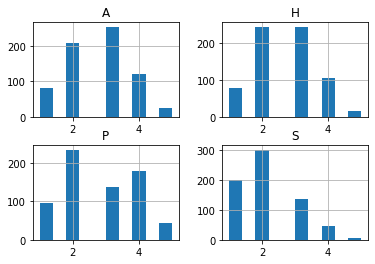

In [23]:
hasp.hist()

* In line with the normal distribution, calculate the confidence interval

In [24]:
#confidence interval
from scipy import stats
mean = [2.617733, 2.702035, 2.071221, 2.767442]
std = [0.956449, 1.003572, 0.913676, 1.166484]
conf_intveral = stats.norm.interval(0.95, loc=mean, scale=std)
print(conf_intveral)

(array([0.74312741, 0.73507002, 0.28044895, 0.48117537]), array([4.49233859, 4.66899998, 3.86199305, 5.05370863]))


In [25]:
V2_1 = V2_1[(0.74312741 <= V2_1['H']) & (V2_1['H'] <= 4.49233859) & (0.73507002 <= V2_1['A']) & (V2_1['A'] <= 4.66899998) &\
     (0.28044895 <= V2_1['S']) & (V2_1['S'] <= 3.86199305) & (0.48117537 <= V2_1['P']) & (V2_1['P'] <= 5.05370863)]


In [26]:
V2_1.shape

(614, 18)

Text(0.5, 1.0, 'Average score of HASP')

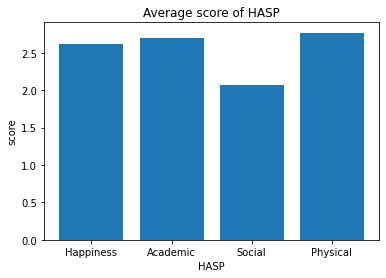

In [27]:
x = range(4)
index_x = ['Happiness','Academic','Social','Physical']
plt.bar(x, hasp.mean(), tick_label=index_x)

plt.xlabel('HASP')
plt.ylabel('score')
plt.title('Average score of HASP')


### Show the impact of different confounder

In [28]:
V2_1['gender'].value_counts()

Male                               386
Female                             217
Other or prefer not to disclose     11
Name: gender, dtype: int64

* gender

* Gender is a very important demographic, so remove other

In [29]:
V2_1 = V2_1[-V2_1['gender'].str.contains('Other')]

([<matplotlib.patches.Wedge at 0x7f9075b5d470>,
 [Text(-0.46877200660715784, 0.9951144687027211, 'Male'),
  Text(0.4687720066071578, -0.9951144687027212, 'Female')])

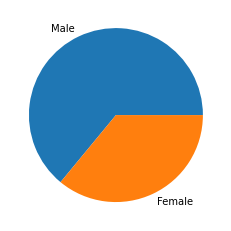

In [30]:
labels ='Male','Female'
length = len(V2_1['gender'])
fraces = [len(V2_1[V2_1['gender'] == 'Male'])/length, len(V2_1[V2_1['gender'] == 'Female'])/length]
plt.pie(x=fraces,labels= labels)

In [31]:
V2_1.groupby('gender')[['H','A','S','P']].mean()

,H,A,S,P
gender,,,,
Female,2.534562,2.645161,2.009217,2.935484
Male,2.489637,2.562176,1.831606,2.588083


Text(0.5, 1.0, 'Average score of HASP for defferent gender')

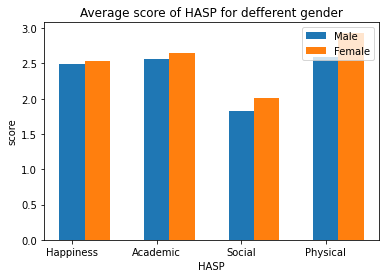

In [32]:
x = np.arange(4)
index_x = ['Happiness','Academic','Social','Physical']

val_ma = V2_1[V2_1['gender'] == 'Male'][['H','A','S','P']].mean()
val_fe = V2_1[V2_1['gender'] == 'Female'][['H','A','S','P']].mean()
bar_width = 0.3

plt.bar(x, val_ma, bar_width, tick_label = index_x)
plt.bar(x+bar_width, val_fe, bar_width, align = "center")
plt.legend(['Male','Female'], loc = 'upper right')

plt.xlabel('HASP')
plt.ylabel('score')
plt.title('Average score of HASP for defferent gender')

In [33]:
val_ma-val_fe

H   -0.044925
A   -0.082985
S   -0.177610
P   -0.347401
dtype: float64

* Female's situation are better than male's

In [34]:
V2_1['gender'].unique()

array(['Male', 'Female'], dtype=object)

* university

In [35]:
V2_1['university'].value_counts()

Saclay                      438
Barcelona                    22
Trento                       17
KTH                          15
INAOE                        15
Berlin                       14
Aalto                         9
Nice                          9
Alicante                      8
milano                        8
Madrid                        7
Twente                        7
Berkeley                      5
polytecnique                  4
Eindhoven                     4
ELTE                          3
Rennes                        2
ENSIIE                        2
Turku                         2
Grenoble                      2
Munich                        2
EURECOM                       1
Portland                      1
Imperial College              1
Keio                          1
Upm                           1
Sorbonne                      1
EPFL                          1
Nationality of Singapore      1
Name: university, dtype: int64

In [36]:
V2_1.groupby('university')[['H','A','S','P']].mean()

,H,A,S,P
university,,,,
Aalto,2.111111,2.222222,1.777778,2.444444
Alicante,2.375000,2.500000,1.875000,2.125000
Barcelona,1.954545,2.500000,1.636364,2.318182
Berkeley,2.800000,2.600000,2.000000,2.800000
Berlin,2.428571,2.214286,1.428571,2.214286
ELTE,3.000000,2.000000,1.000000,4.000000
ENSIIE,3.500000,3.500000,1.500000,3.500000
EPFL,1.000000,1.000000,2.000000,1.000000
EURECOM,1.000000,1.000000,1.000000,1.000000


In [37]:
#France
V2_1.loc[V2_1['university'].str.contains('Paris|Saclay|Eit|Central|Sorbonne|Lyon|polytecnique|ENSIIE|Grenoble|Nice|Rennes'), 'university'] = 'France'

#Spain
V2_1.loc[V2_1['university'].str.contains('Barcelona|Madrid'), 'university'] = 'Spain'

#Italy
V2_1.loc[V2_1['university'].str.contains('Trento|Milano'), 'university'] = 'Italy'

#Germany
V2_1.loc[V2_1['university'].str.contains('Berlin|Munich'), 'university'] = 'Germany'

In [38]:
V2_1.shape

(603, 18)

In [39]:
V2_1.groupby('university')['university'].count()

university
Aalto                         9
Alicante                      8
Berkeley                      5
ELTE                          3
EPFL                          1
EURECOM                       1
Eindhoven                     4
France                      458
Germany                      16
INAOE                        15
Imperial College              1
Italy                        17
KTH                          15
Keio                          1
Nationality of Singapore      1
Portland                      1
Spain                        29
Turku                         2
Twente                        7
Upm                           1
milano                        8
Name: university, dtype: int64

In [40]:
V2_1 = V2_1[V2_1['university'].str.contains('France|Spain')]

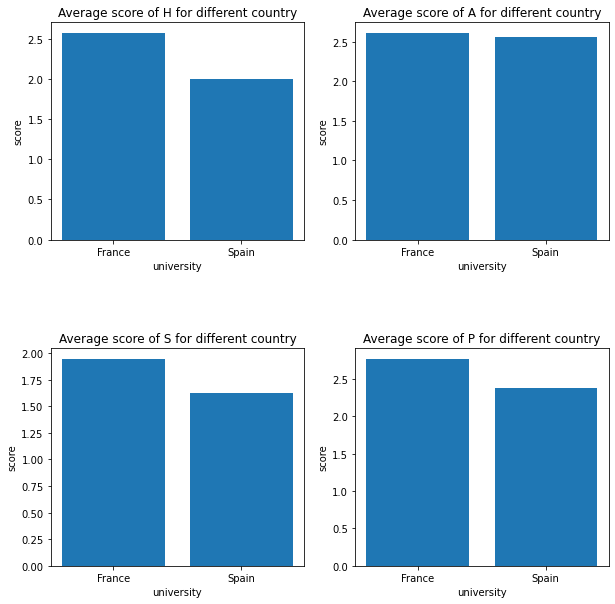

In [41]:
index_uni = ['France', 'Spain']

fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace = 0.5)

plt.subplot(221)
plt.bar(range(len(index_uni)), V2_1.groupby('university')['H'].mean(), tick_label=index_uni)
plt.xlabel('university')
plt.ylabel('score')
plt.title('Average score of H for different country')

plt.subplot(222)
plt.bar(range(len(index_uni)), V2_1.groupby('university')['A'].mean(), tick_label=index_uni)
plt.xlabel('university')
plt.ylabel('score')
plt.title('Average score of A for different country')

plt.subplot(223)
plt.bar(range(len(index_uni)), V2_1.groupby('university')['S'].mean(), tick_label=index_uni)
plt.xlabel('university')
plt.ylabel('score')
plt.title('Average score of S for different country')

plt.subplot(224)
plt.bar(range(len(index_uni)), V2_1.groupby('university')['P'].mean(), tick_label=index_uni)
plt.xlabel('university')
plt.ylabel('score')
plt.title('Average score of P for different country')
plt.show()

* According to the law of large numbers, a sample of more than 30 is significant,so the data of France and Spain are the only two countries of data that we coulduse

* It can be seen that the data of the two schools are slightly different in H and P, so we try to add the influence of gender to see if gender affects the result

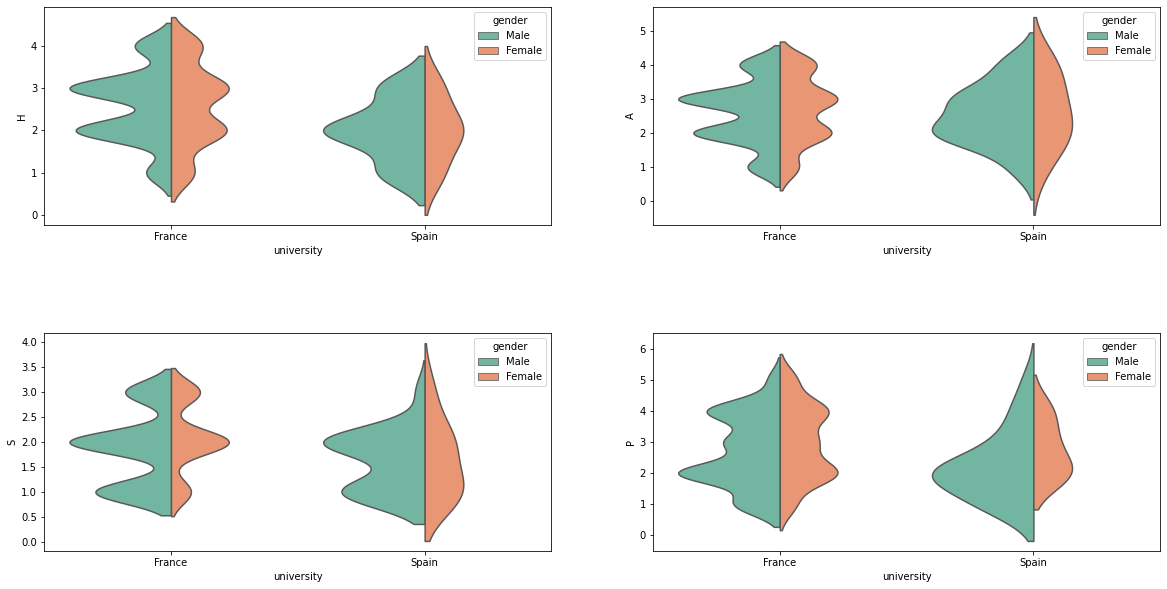

In [42]:
fig = plt.figure(figsize=(20,10))
fig.subplots_adjust(hspace = 0.5)

plt.subplot(221)
sns.violinplot(x="university", y="H", hue="gender",data=V2_1, palette="Set2", split=True,scale="count", inner=None)

plt.subplot(222)
sns.violinplot(x="university", y="A", hue="gender",data=V2_1, palette="Set2", split=True,scale="count", inner=None)

plt.subplot(223)
sns.violinplot(x="university", y="S", hue="gender",data=V2_1, palette="Set2", split=True,scale="count", inner=None)

plt.subplot(224)
sns.violinplot(x="university", y="P", hue="gender",data=V2_1, palette="Set2", split=True,scale="count", inner=None)
plt.show()

* Even if the gender is separated, the trend is still the same as when combined, so even if the gender influence is removed, the university still has an influence. It is assumed that the location of the school has an influence. Then we have to look at the specific impact of schools on different genders

Text(0.5, 1.0, 'Average score of HASP for defferent university on male')

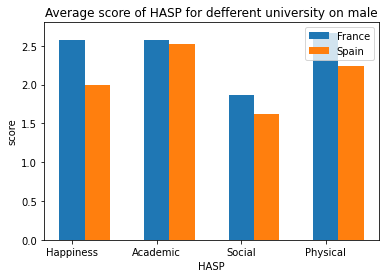

In [43]:
x = np.arange(4)
index_x = ['Happiness','Academic','Social','Physical']

val_sa = V2_1[V2_1['university'] == 'France'][V2_1['gender'] == 'Male'][['H','A','S','P']].mean()
val_ba = V2_1[V2_1['university'] == 'Spain'][V2_1['gender'] == 'Male'][['H','A','S','P']].mean()
bar_width = 0.3

plt.bar(x, val_sa, bar_width, tick_label = index_x)
plt.bar(x+bar_width, val_ba, bar_width, align = "center")
plt.legend(['France','Spain'], loc = 'upper right')

plt.xlabel('HASP')
plt.ylabel('score')
plt.title('Average score of HASP for defferent university on male')

Text(0.5, 1.0, 'Average score of HASP for defferent university on female')

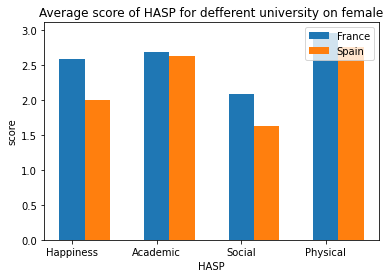

In [44]:
x = np.arange(4)
index_x = ['Happiness','Academic','Social','Physical']

val_sa_fe = V2_1[V2_1['university'] == 'France'][V2_1['gender'] == 'Female'][['H','A','S','P']].mean()
val_ba_fe = V2_1[V2_1['university'] == 'Spain'][V2_1['gender'] == 'Female'][['H','A','S','P']].mean()
bar_width = 0.3

plt.bar(x, val_sa_fe, bar_width, tick_label = index_x)
plt.bar(x+bar_width, val_ba_fe, bar_width, align = "center")
plt.legend(['France','Spain'], loc = 'upper right')

plt.xlabel('HASP')
plt.ylabel('score')
plt.title('Average score of HASP for defferent university on female')

* Impact of original country

Text(0.5, 1.0, 'Average score of HASP for different origin country on male')

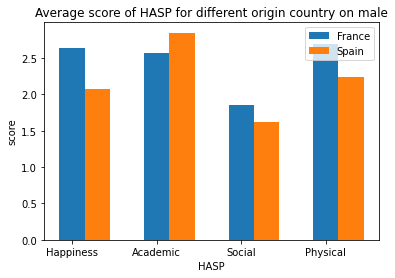

In [45]:
x = np.arange(4)
index_x = ['Happiness','Academic','Social','Physical']

val_ofr = V2_1[V2_1['university'] == 'France'][V2_1['gender'] == 'Male'][V2_1['origin'].str.contains('Same')][['H','A','S','P']].mean()
val_osp = V2_1[V2_1['university'] == 'Spain'][V2_1['gender'] == 'Male'][V2_1['origin'].str.contains('Same')][['H','A','S','P']].mean()
bar_width = 0.3

plt.bar(x, val_ofr, bar_width, tick_label = index_x)
plt.bar(x+bar_width, val_osp, bar_width, align = "center")
plt.legend(['France','Spain'], loc = 'upper right')

plt.xlabel('HASP')
plt.ylabel('score')
plt.title('Average score of HASP for different origin country on male')

Text(0.5, 1.0, 'Average score of HASP for different origin country on male')

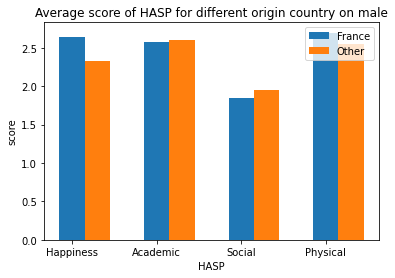

In [46]:
val_oother = V2_1[V2_1['university'] == 'France'][V2_1['gender'] == 'Male'][V2_1['origin'].str.contains('Other')][['H','A','S','P']].mean()
plt.bar(x, val_ofr, bar_width, tick_label = index_x)
plt.bar(x+bar_width, val_oother, bar_width, align = "center")
plt.legend(['France','Other'], loc = 'upper right')

plt.xlabel('HASP')
plt.ylabel('score')
plt.title('Average score of HASP for different origin country on male')

Text(0.5, 1.0, 'Average score of HASP for defferent university on female')

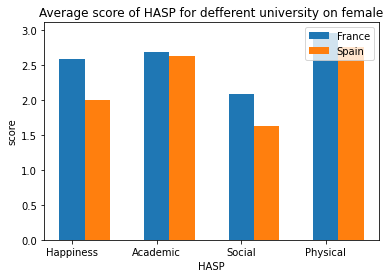

In [47]:
x = np.arange(4)
index_x = ['Happiness','Academic','Social','Physical']

val_sa = V2_1[V2_1['university'] == 'France'][V2_1['gender'] == 'Female'][['H','A','S','P']].mean()
val_ba = V2_1[V2_1['university'] == 'Spain'][V2_1['gender'] == 'Female'][['H','A','S','P']].mean()
bar_width = 0.3

plt.bar(x, val_sa, bar_width, tick_label = index_x)
plt.bar(x+bar_width, val_ba, bar_width, align = "center")
plt.legend(['France','Spain'], loc = 'upper right')

plt.xlabel('HASP')
plt.ylabel('score')
plt.title('Average score of HASP for defferent university on female')

In [48]:
V2_1[V2_1['university'] == 'France'][V2_1['gender'] == 'Male'][V2_1['origin'].str.contains('Other')].count()



time                     53
gender                   53
location                 53
university               53
year of study            53
year of program          53
major                    53
origin                   53
sheltering place         53
stringency               53
dramatic change          53
A                        53
P                        53
H                        53
S                        53
experience quarantine    53
effect quarantine        53
comment                  53
dtype: int64

* We could find that the school has a great influence on them, but the overall status is still better for boys than girls, but it can be seen that the status of the two schools' Students are very different

* university location

In [49]:
V2_1['location'].value_counts()

France            448
Spain              29
Sweden              1
Canada              1
United States       1
Germany             1
Switzerland         1
Korea South         1
Singapore           1
United Kingdom      1
Gabon               1
Finland             1
Name: location, dtype: int64

In [50]:
V2_1.groupby('location')[['H','A','S','P']].mean()

,H,A,S,P
location,,,,
Canada,3.000000,2.000000,1.000000,1.000000
Finland,3.000000,4.000000,2.000000,2.000000
France,2.589286,2.618304,1.953125,2.785714
Gabon,1.000000,1.000000,1.000000,1.000000
Germany,1.000000,2.000000,1.000000,4.000000
Korea South,3.000000,4.000000,1.000000,2.000000
Singapore,2.000000,2.000000,1.000000,2.000000
Spain,2.000000,2.551724,1.620690,2.379310
Sweden,1.000000,1.000000,2.000000,2.000000


* If you look at the location alone, it is consistent with the previous conclusions, but it cannot be asserted, because France and Spain have only one school, so we need to see whether their place of residence will affect

In [51]:
V2_1[V2_1['university'] == 'France'][V2_1['gender'] == 'Male'][V2_1['origin'].str.contains('Other')].count()


time                     53
gender                   53
location                 53
university               53
year of study            53
year of program          53
major                    53
origin                   53
sheltering place         53
stringency               53
dramatic change          53
A                        53
P                        53
H                        53
S                        53
experience quarantine    53
effect quarantine        53
comment                  53
dtype: int64

In [52]:
val_sother = V2_1[V2_1['university'] == 'France'][V2_1['gender'] == 'Male'][V2_1['sheltering place'].str.contains('Other')][['H','A','S','P']].mean()


Text(0.5, 1.0, 'Average score of HASP ')

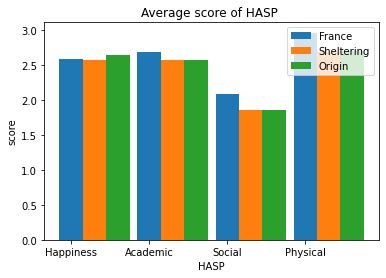

In [53]:


x = np.arange(4)
index_x = ['Happiness','Academic','Social','Physical']
bar_width = 0.3
val_sfr = V2_1[V2_1['university'] == 'France'][V2_1['gender'] == 'Male'][V2_1['sheltering place'].str.contains('lodging')][['H','A','S','P']].mean()

plt.bar(x, val_sa, bar_width, tick_label = index_x)
plt.bar(x+bar_width, val_sfr, bar_width, align = "center")
plt.bar(x+2*bar_width, val_ofr, bar_width, align = "center")

plt.legend(['France','Sheltering','Origin'], loc = 'upper right')

plt.xlabel('HASP')
plt.ylabel('score')
plt.title('Average score of HASP ')

In [54]:
val_sa_fe = V2_1[V2_1['university'] == 'France'][V2_1['gender'] == 'Female'][['H','A','S','P']].mean()
val_ofr_fe = V2_1[V2_1['university'] == 'France'][V2_1['gender'] == 'Female'][V2_1['origin'].str.contains('Same')][['H','A','S','P']].mean()
val_sfr_fe = V2_1[V2_1['university'] == 'France'][V2_1['gender'] == 'Female'][V2_1['sheltering place'].str.contains('lodging')][['H','A','S','P']].mean()


Text(0.5, 1.0, 'Average score of HASP of female ')

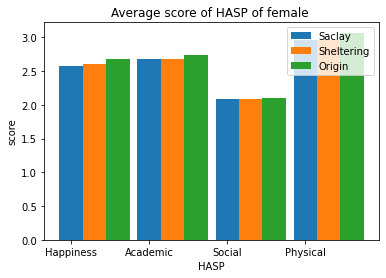

In [55]:
x = np.arange(4)
index_x = ['Happiness','Academic','Social','Physical']
bar_width = 0.3

plt.bar(x, val_sa_fe, bar_width, tick_label = index_x)
plt.bar(x+bar_width, val_sfr_fe, bar_width, align = "center")
plt.bar(x+2*bar_width, val_ofr_fe, bar_width, align = "center")

plt.legend(['Saclay','Sheltering','Origin'], loc = 'upper right')

plt.xlabel('HASP')
plt.ylabel('score')
plt.title('Average score of HASP of female ')

* Year of study

In [56]:
V2_1['year of study'].value_counts()

1    170
3     87
2     80
4     74
5     58
8      6
7      6
6      6
Name: year of study, dtype: int64

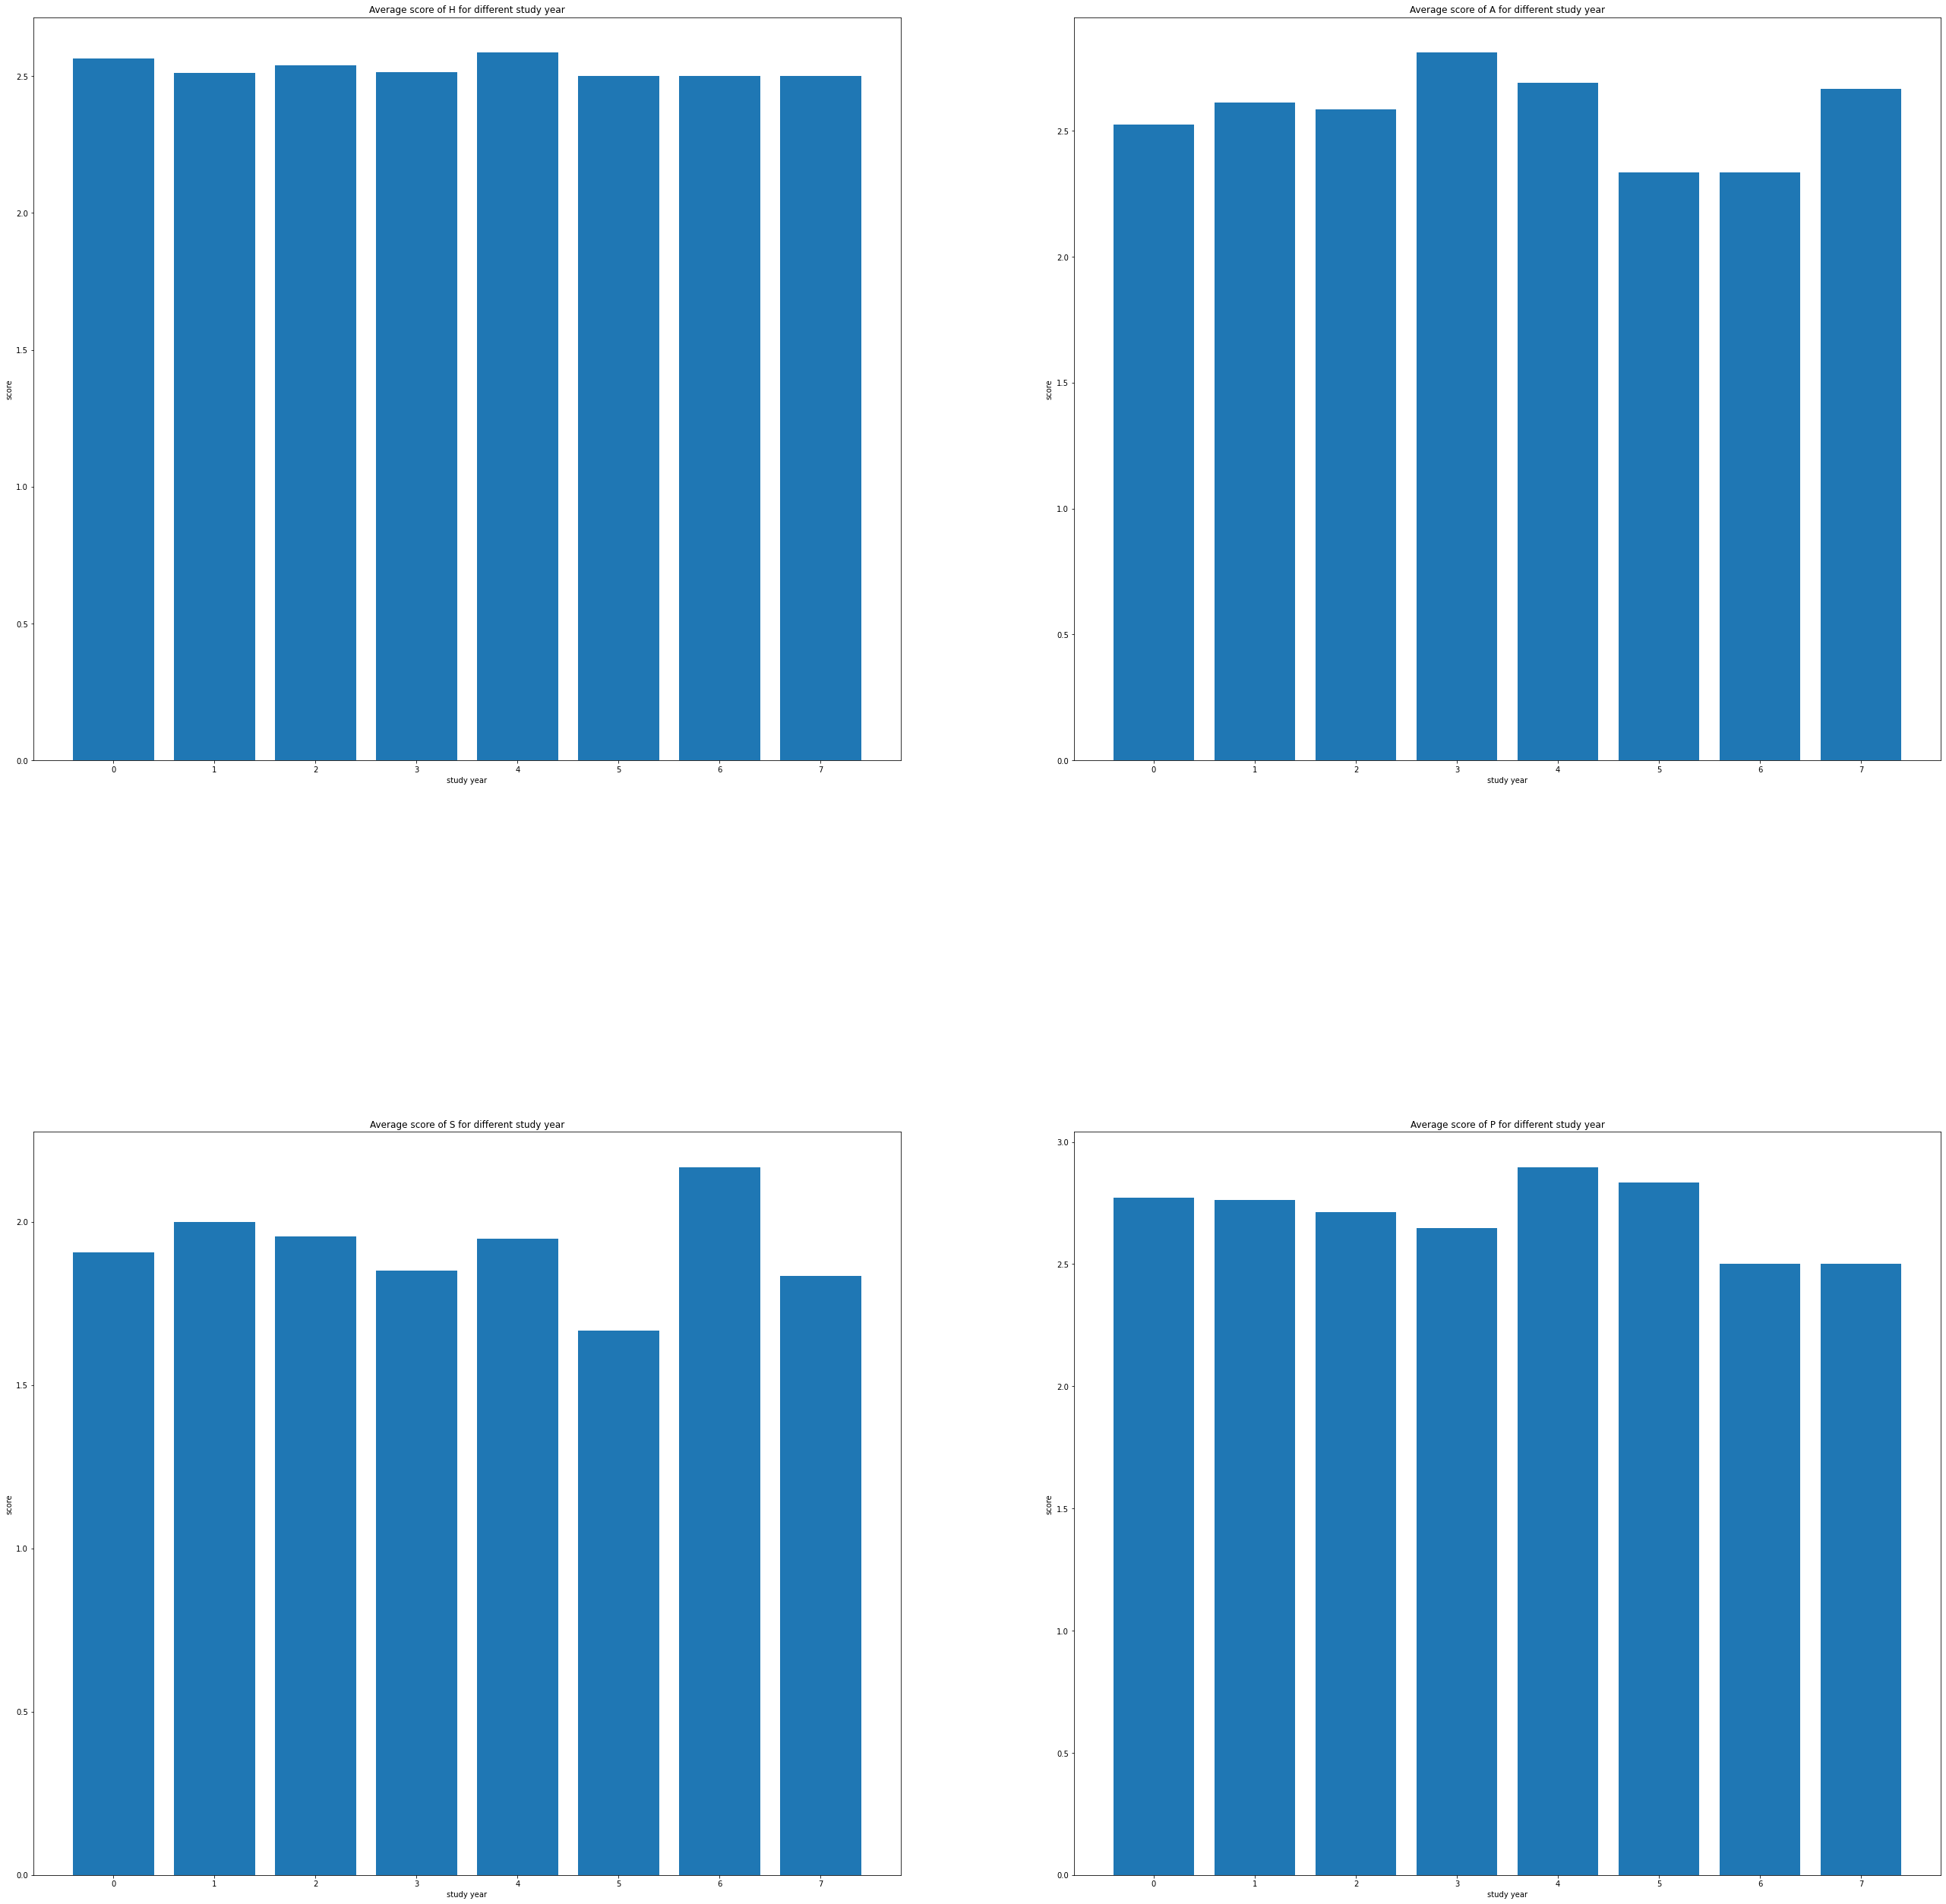

In [57]:
index_stu_year = range(8)

fig = plt.figure(figsize=(45,45))
fig.subplots_adjust(hspace = 0.5)

plt.subplot(221)
plt.bar(index_stu_year, V2_1.groupby('year of study')['H'].mean())
plt.xlabel('study year')
plt.ylabel('score')
plt.title('Average score of H for different study year')

plt.subplot(222)
plt.bar(index_stu_year, V2_1.groupby('year of study')['A'].mean())
plt.xlabel('study year')
plt.ylabel('score')
plt.title('Average score of A for different study year')

plt.subplot(223)
plt.bar(index_stu_year, V2_1.groupby('year of study')['S'].mean())
plt.xlabel('study year')
plt.ylabel('score')
plt.title('Average score of S for different study year')

plt.subplot(224)
plt.bar(index_stu_year, V2_1.groupby('year of study')['P'].mean())
plt.xlabel('study year')
plt.ylabel('score')
plt.title('Average score of P for different study year')
plt.show()

* For school year, we should exclude the influence of school and gender, so we choose saclay

In [58]:
saclay_male = V2_1[V2_1['university'].str.contains('France')][V2_1['gender'] == 'Male']
saclay_female = V2_1[V2_1['university'].str.contains('France')][V2_1['gender'] == 'Female']

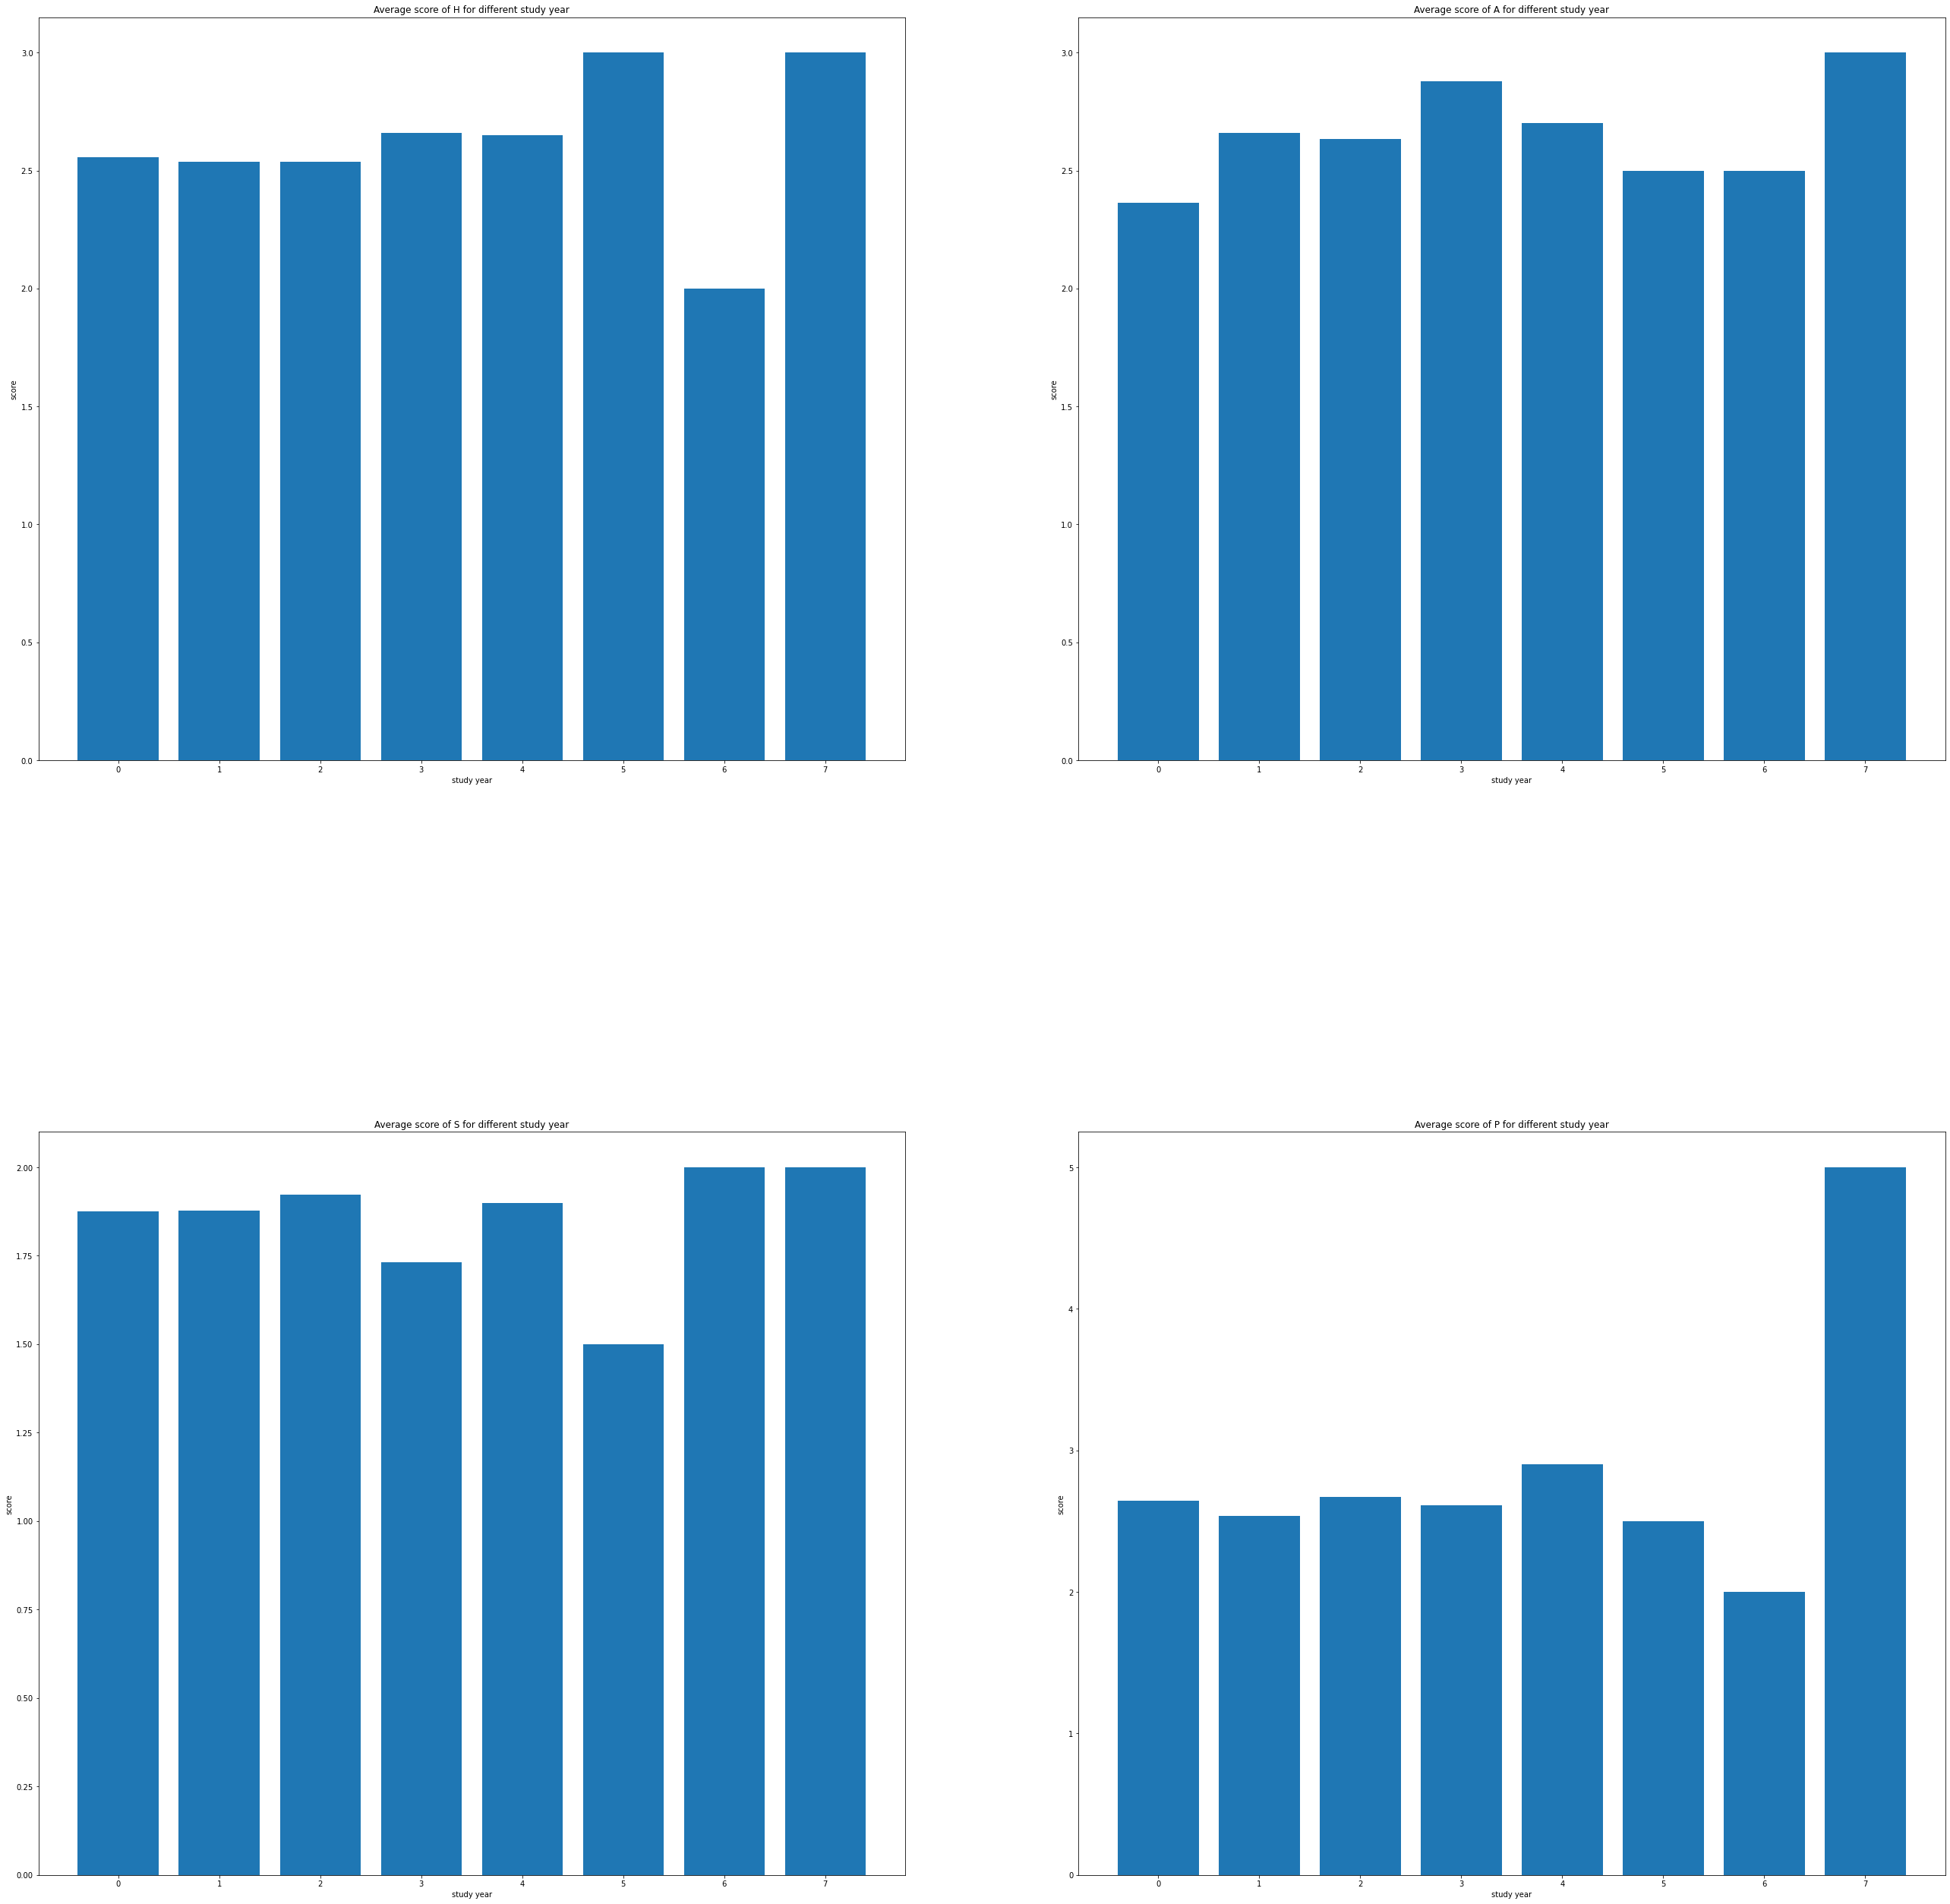

In [59]:
# The impact on HASP of male in saclay
index_stu_year = range(len(saclay_male['year of study'].unique()))

fig = plt.figure(figsize=(45,45))
fig.subplots_adjust(hspace = 0.5)

plt.subplot(221)
plt.bar(index_stu_year, saclay_male.groupby('year of study')['H'].mean())
plt.xlabel('study year')
plt.ylabel('score')
plt.title('Average score of H for different study year')

plt.subplot(222)
plt.bar(index_stu_year, saclay_male.groupby('year of study')['A'].mean())
plt.xlabel('study year')
plt.ylabel('score')
plt.title('Average score of A for different study year')

plt.subplot(223)
plt.bar(index_stu_year, saclay_male.groupby('year of study')['S'].mean())
plt.xlabel('study year')
plt.ylabel('score')
plt.title('Average score of S for different study year')

plt.subplot(224)
plt.bar(index_stu_year, saclay_male.groupby('year of study')['P'].mean())
plt.xlabel('study year')
plt.ylabel('score')
plt.title('Average score of P for different study year')
plt.show()

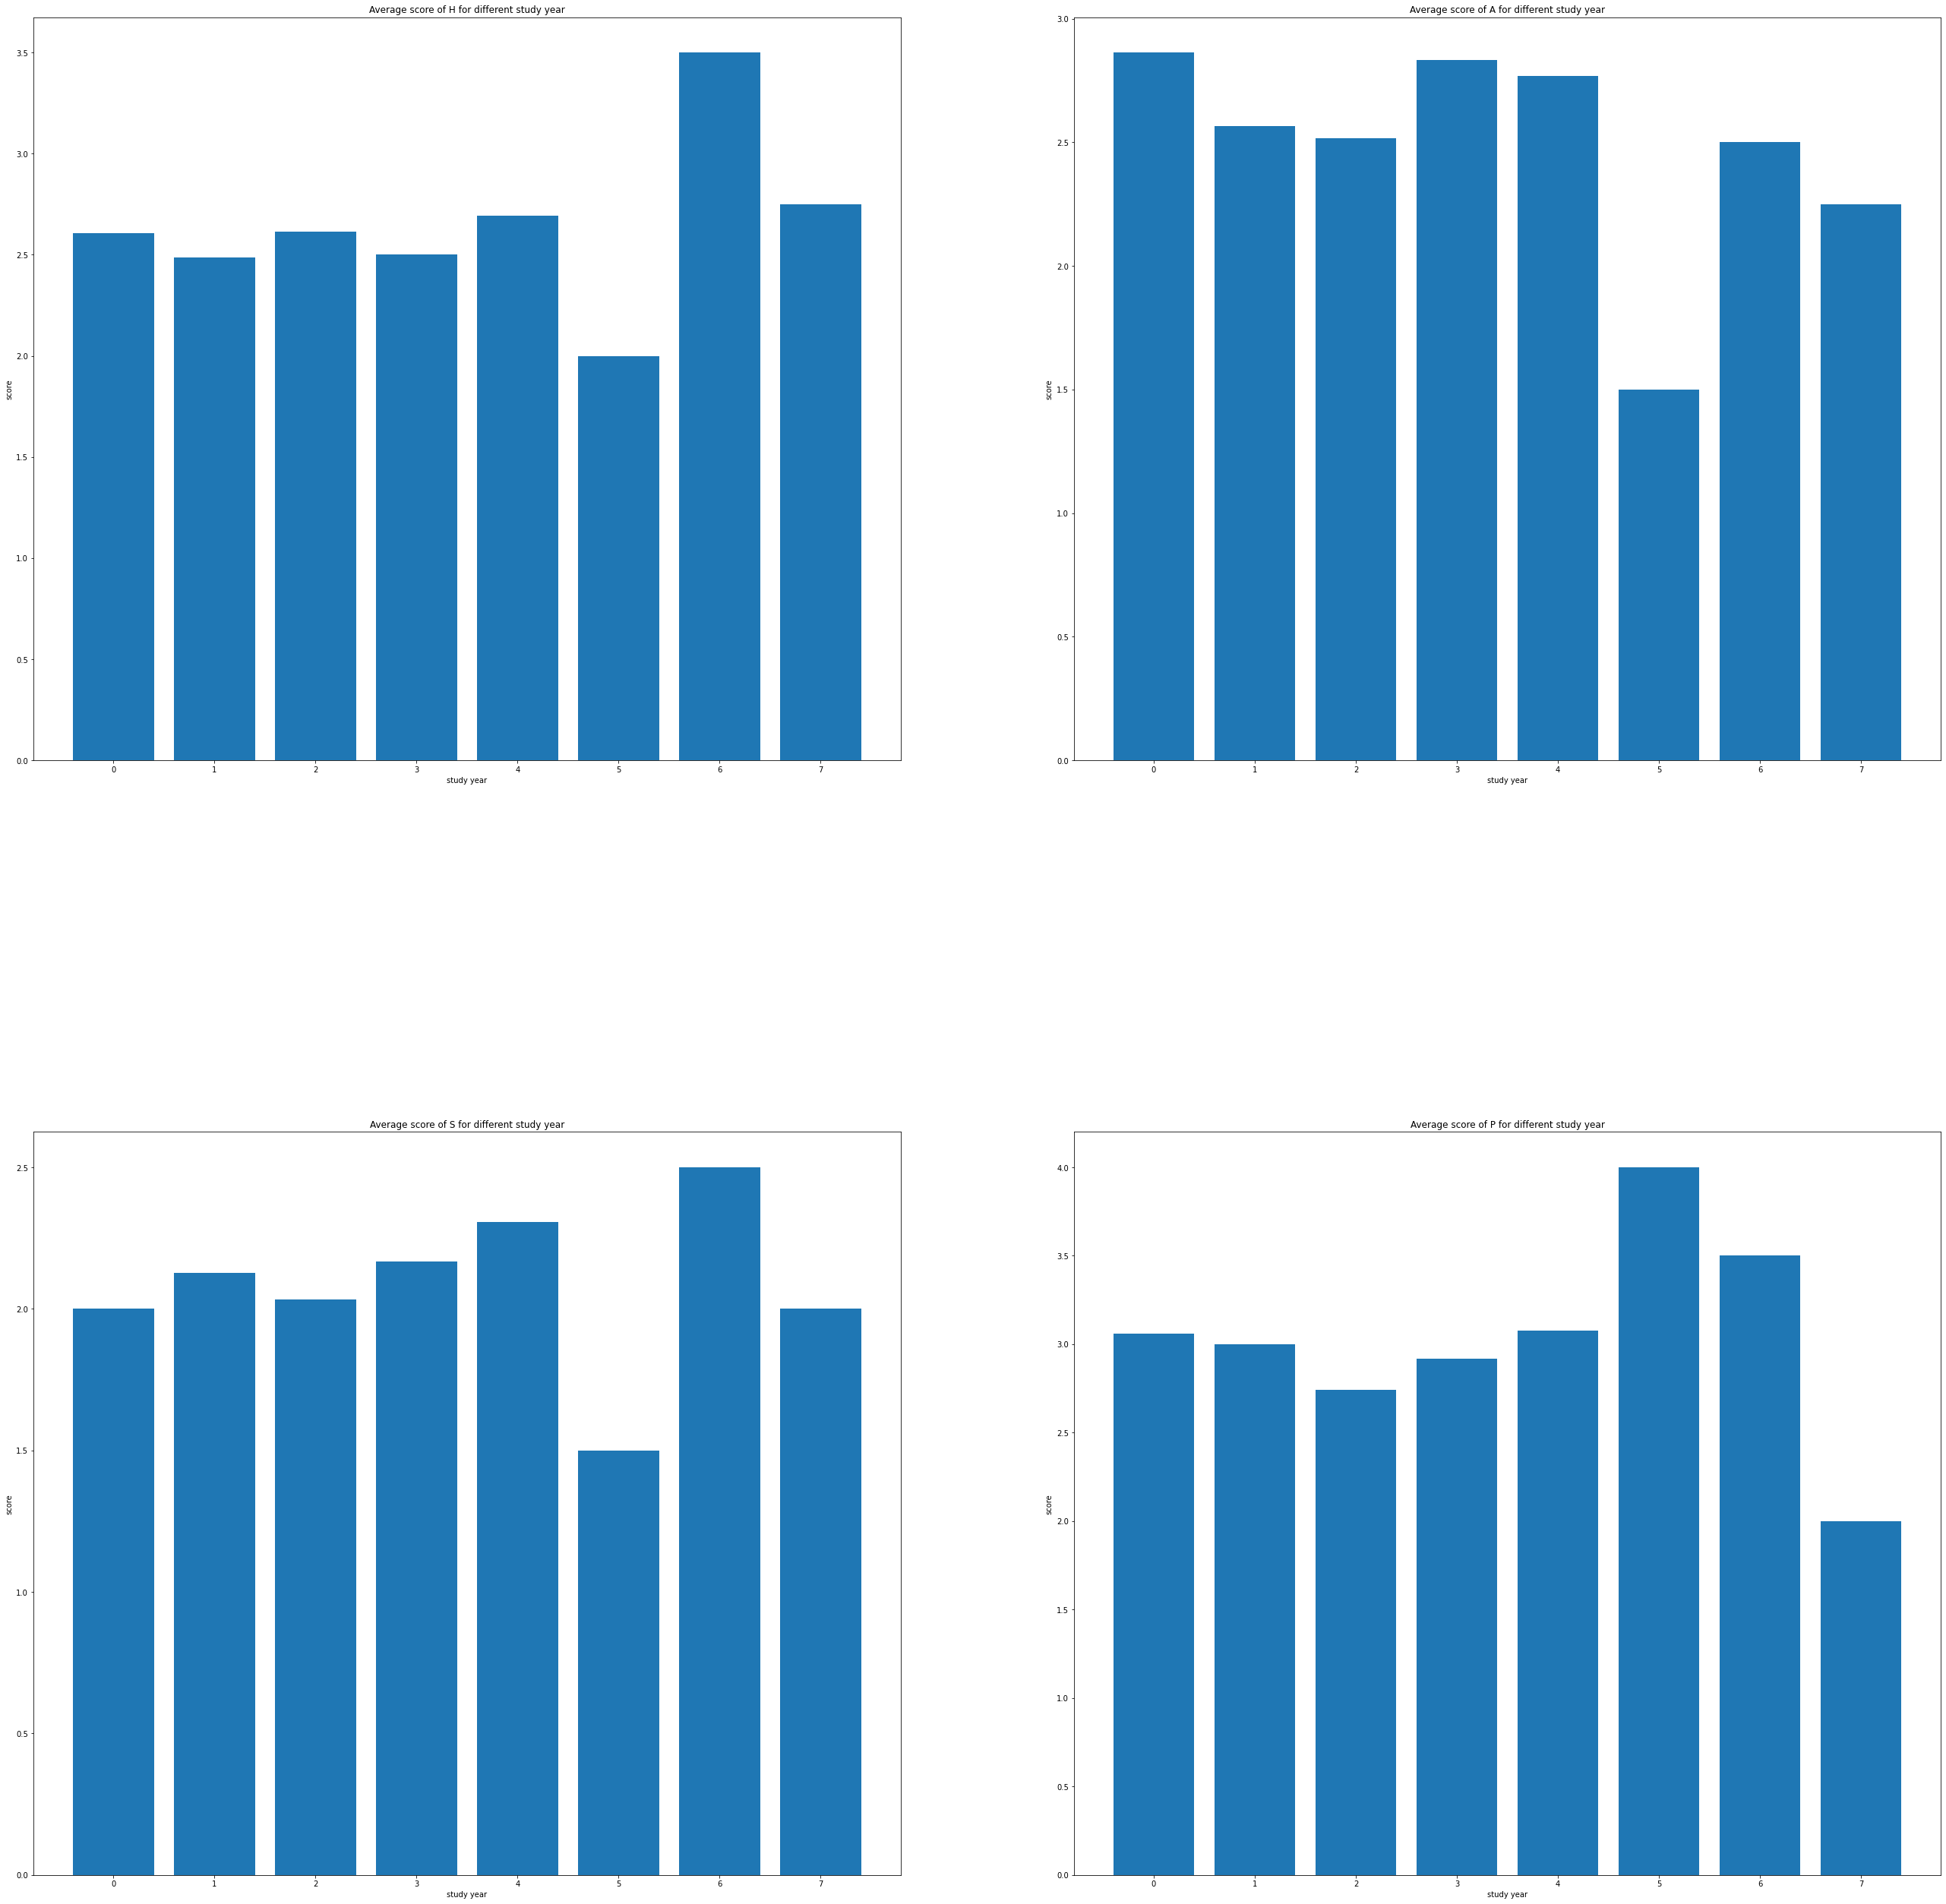

In [60]:
# The impact on HASP of female in saclay
index_stu_year = range(len(saclay_female['year of study'].unique()))

fig = plt.figure(figsize=(45,45))
fig.subplots_adjust(hspace = 0.5)

plt.subplot(221)
plt.bar(index_stu_year, saclay_female.groupby('year of study')['H'].mean())
plt.xlabel('study year')
plt.ylabel('score')
plt.title('Average score of H for different study year')

plt.subplot(222)
plt.bar(index_stu_year, saclay_female.groupby('year of study')['A'].mean())
plt.xlabel('study year')
plt.ylabel('score')
plt.title('Average score of A for different study year')

plt.subplot(223)
plt.bar(index_stu_year, saclay_female.groupby('year of study')['S'].mean())
plt.xlabel('study year')
plt.ylabel('score')
plt.title('Average score of S for different study year')

plt.subplot(224)
plt.bar(index_stu_year, saclay_female.groupby('year of study')['P'].mean())
plt.xlabel('study year')
plt.ylabel('score')
plt.title('Average score of P for different study year')
plt.show()

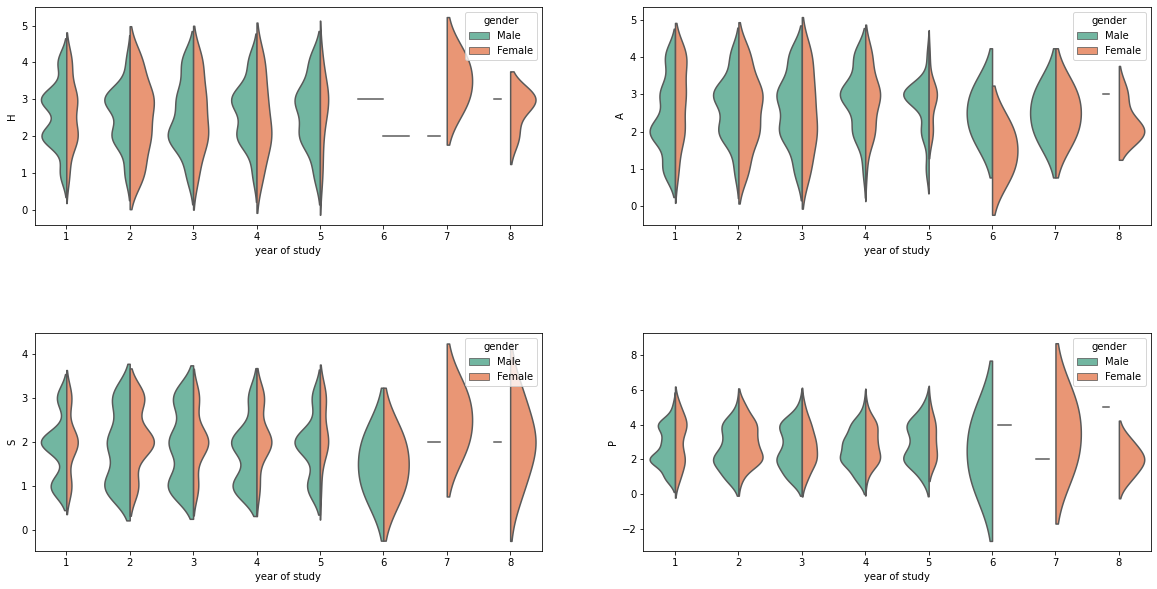

In [61]:
fig = plt.figure(figsize=(20,10))
fig.subplots_adjust(hspace = 0.5)

plt.subplot(221)
sns.violinplot(x="year of study", y="H", hue="gender",data=V2_1[V2_1['university'].str.contains('France')], palette="Set2", split=True,scale="count", inner=None)

plt.subplot(222)
sns.violinplot(x="year of study", y="A", hue="gender",data=V2_1[V2_1['university'].str.contains('France')], palette="Set2", split=True,scale="count", inner=None)

plt.subplot(223)
sns.violinplot(x="year of study", y="S", hue="gender",data=V2_1[V2_1['university'].str.contains('France')], palette="Set2", split=True,scale="count", inner=None)

plt.subplot(224)
sns.violinplot(x="year of study", y="P", hue="gender",data=V2_1[V2_1['university'].str.contains('France')], palette="Set2", split=True,scale="count", inner=None)
plt.show()

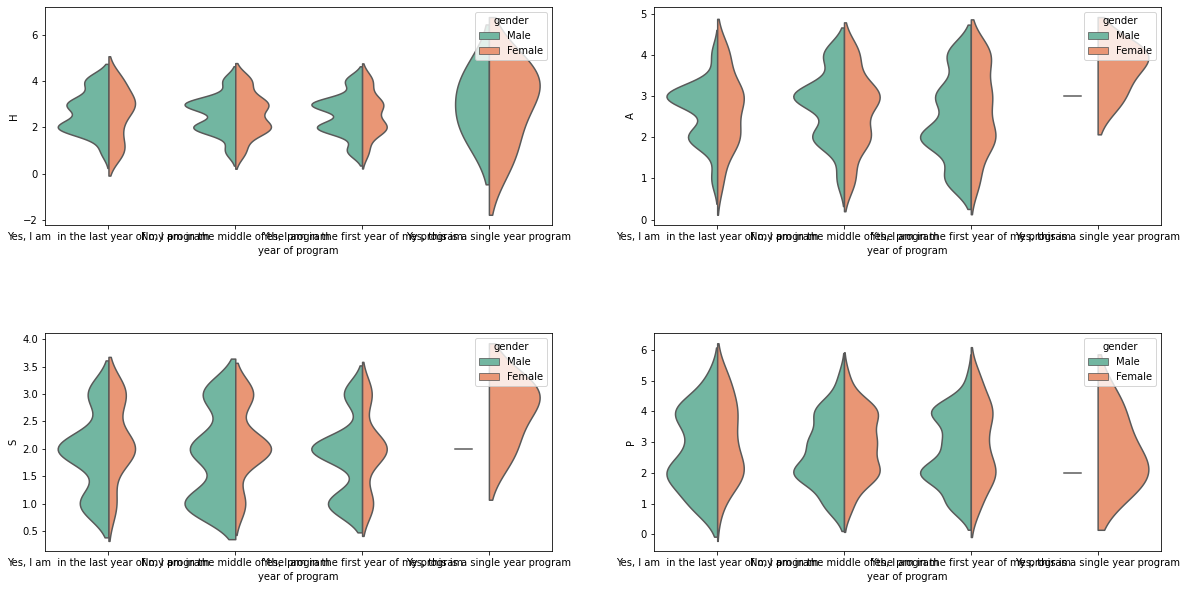

In [62]:
fig = plt.figure(figsize=(20,10))
fig.subplots_adjust(hspace = 0.5)

plt.subplot(221)
sns.violinplot(x="year of program", y="H", hue="gender",data=V2_1[V2_1['university'].str.contains('France')], palette="Set2", split=True,scale="count", inner=None)

plt.subplot(222)
sns.violinplot(x="year of program", y="A", hue="gender",data=V2_1[V2_1['university'].str.contains('France')], palette="Set2", split=True,scale="count", inner=None)

plt.subplot(223)
sns.violinplot(x="year of program", y="S", hue="gender",data=V2_1[V2_1['university'].str.contains('France')], palette="Set2", split=True,scale="count", inner=None)

plt.subplot(224)
sns.violinplot(x="year of program", y="P", hue="gender",data=V2_1[V2_1['university'].str.contains('France')], palette="Set2", split=True,scale="count", inner=None)
plt.show()

* Basically, the first-year of program has a relatively high Pressure, like the first year for undergraduate, master, especially doctoral.

* First year or last year

* Just now we excluded the influence on the grade. Now try to see if the same conditions are the same for the graduates.

In [63]:
saclay_male['year of program'].unique()

array(['Yes, I am  in the last year of my program',
       'No, I am in the middle of the program',
       'Yes, I am in the first year of my program',
       'Yes, this is a single year program'], dtype=object)

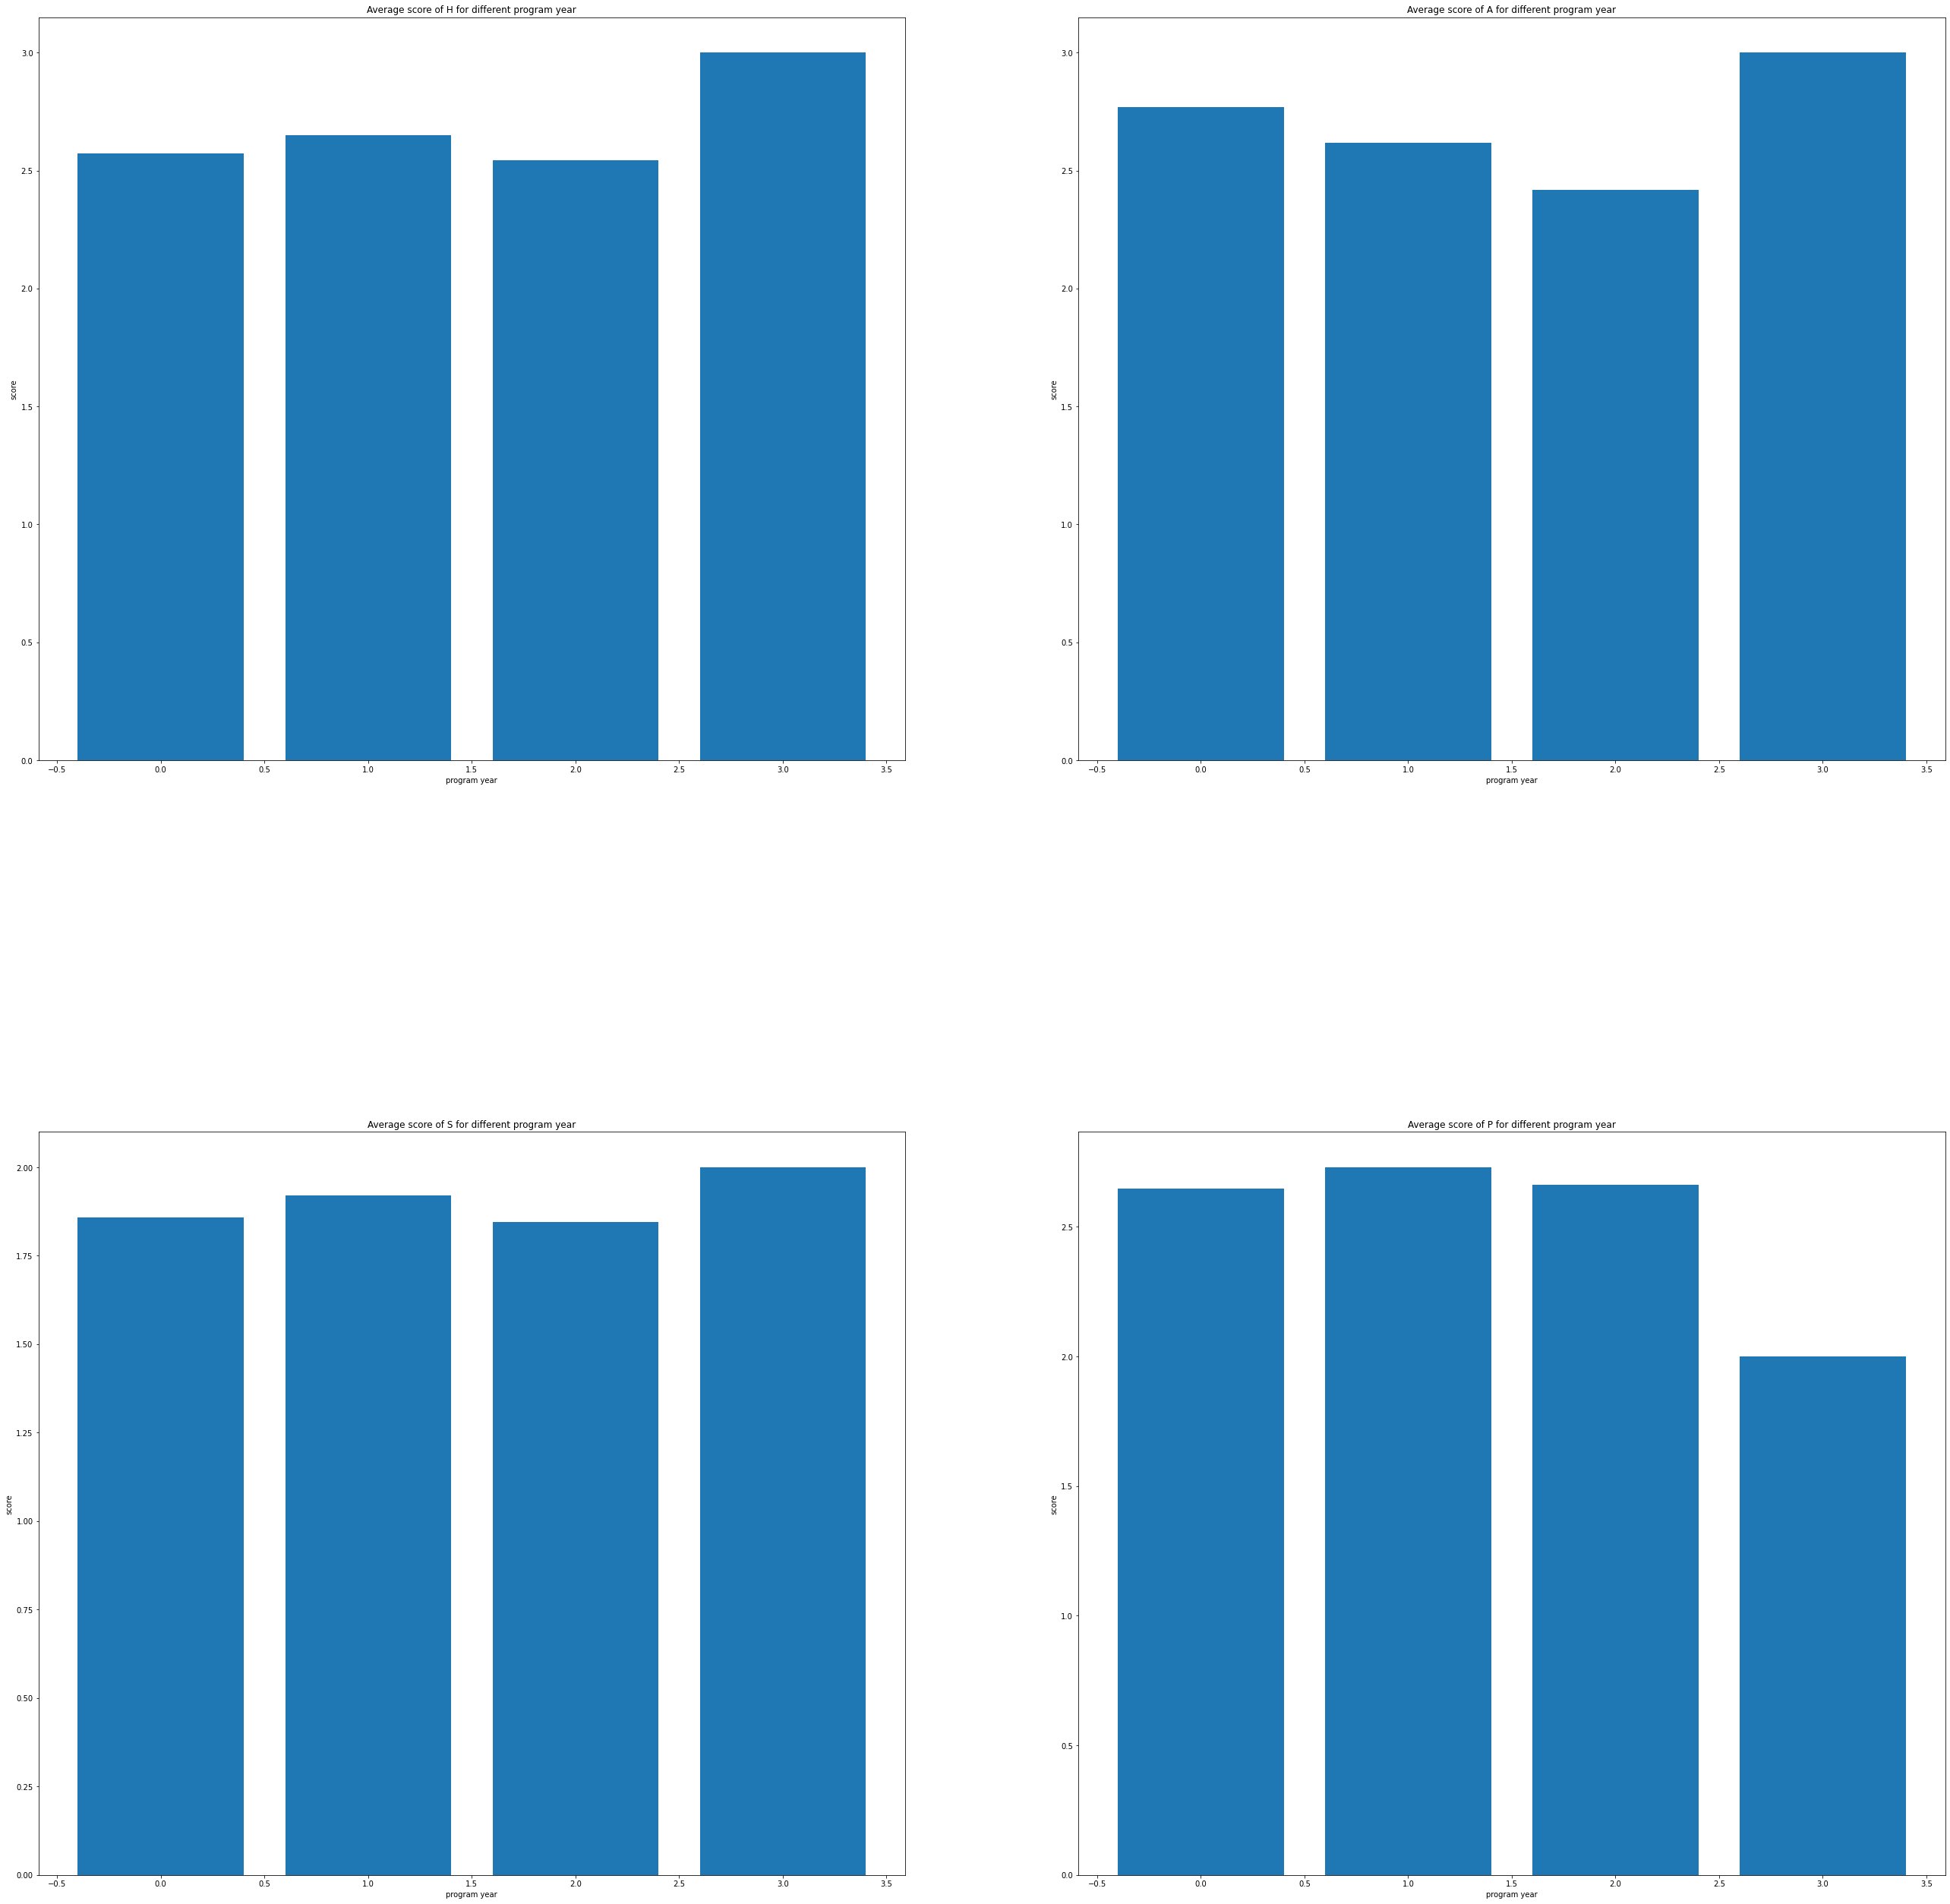

In [64]:
# The impact on HASP of male in saclay
index_stu_year = range(len(saclay_male['year of program'].unique()))

fig = plt.figure(figsize=(45,45))
fig.subplots_adjust(hspace = 0.5)

plt.subplot(221)
plt.bar(index_stu_year, saclay_male.groupby('year of program')['H'].mean())
plt.xlabel('program year')
plt.ylabel('score')
plt.title('Average score of H for different program year')

plt.subplot(222)
plt.bar(index_stu_year, saclay_male.groupby('year of program')['A'].mean())
plt.xlabel('program year')
plt.ylabel('score')
plt.title('Average score of A for different program year')

plt.subplot(223)
plt.bar(index_stu_year, saclay_male.groupby('year of program')['S'].mean())
plt.xlabel('program year')
plt.ylabel('score')
plt.title('Average score of S for different program year')

plt.subplot(224)
plt.bar(index_stu_year, saclay_male.groupby('year of program')['P'].mean())
plt.xlabel('program year')
plt.ylabel('score')
plt.title('Average score of P for different program year')
plt.show()

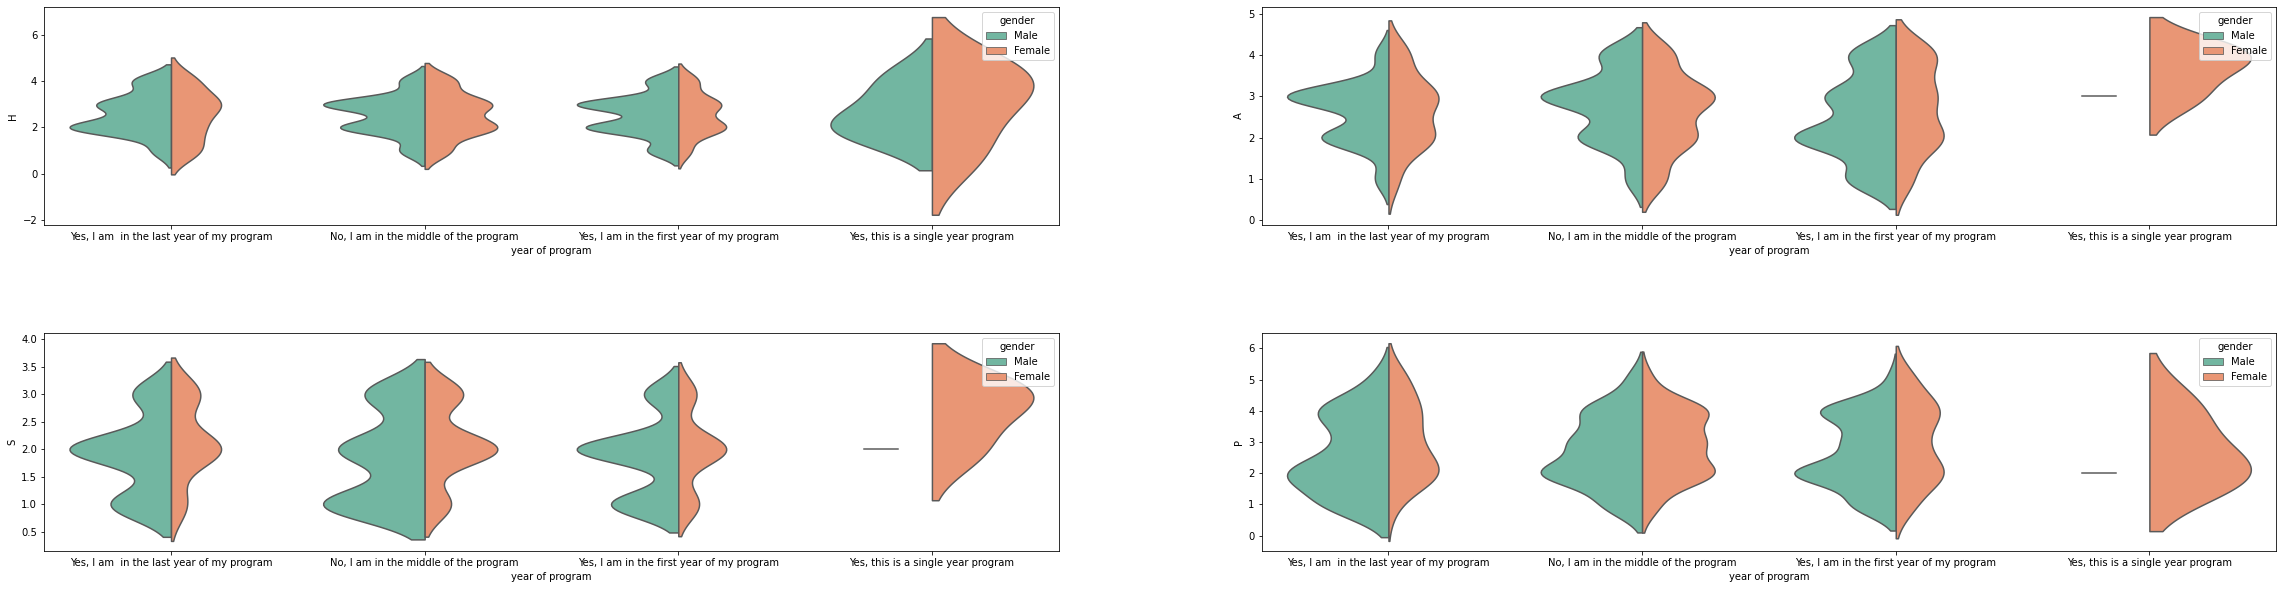

In [65]:
fig = plt.figure(figsize=(40,10))
fig.subplots_adjust(hspace = 0.5)

plt.subplot(221)
sns.violinplot(x="year of program", y="H", hue="gender",data=V2_1, palette="Set2", split=True,scale="count", inner=None)

plt.subplot(222)
sns.violinplot(x="year of program", y="A", hue="gender",data=V2_1, palette="Set2", split=True,scale="count", inner=None)

plt.subplot(223)
sns.violinplot(x="year of program", y="S", hue="gender",data=V2_1, palette="Set2", split=True,scale="count", inner=None)

plt.subplot(224)
sns.violinplot(x="year of program", y="P", hue="gender",data=V2_1, palette="Set2", split=True,scale="count", inner=None)
plt.show()

* Dramatic change

In [66]:
V2_1['dramatic change'].unique()

array(['YES, but due to other reasons', 'YES, due to COVID-19', 'NO',
       'Prefer not to say'], dtype=object)

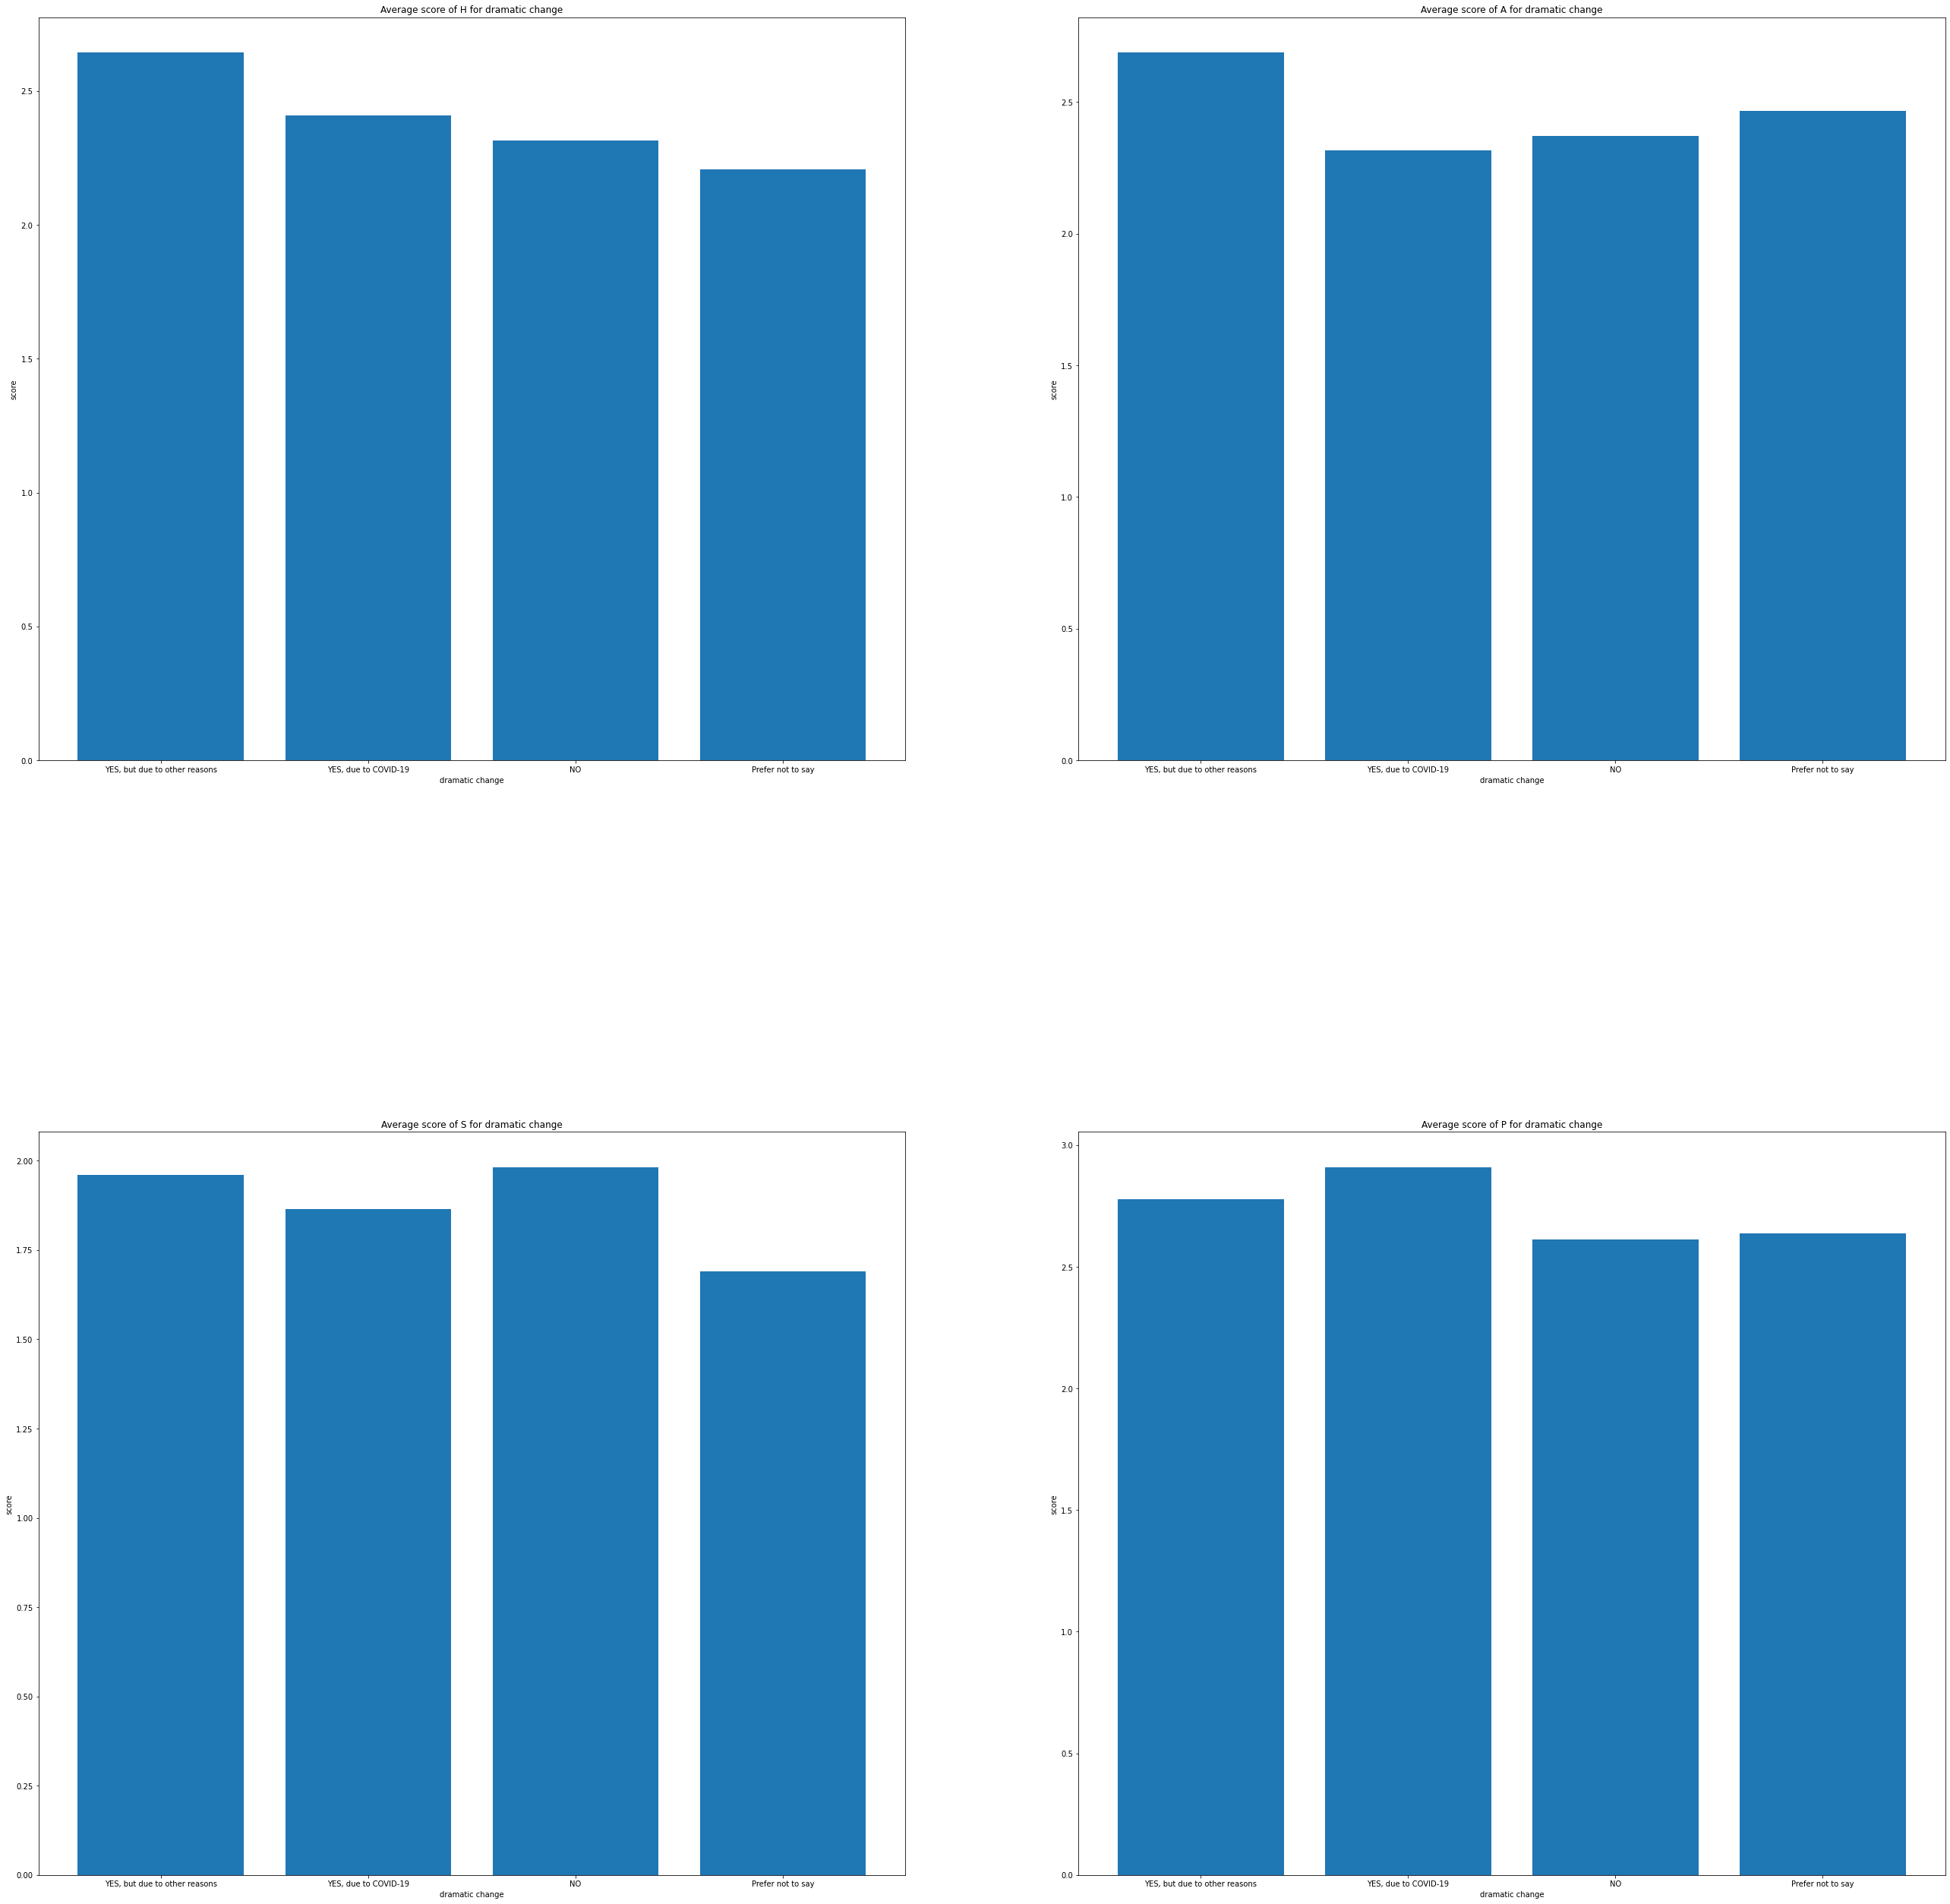

In [67]:
index_uni = ['YES, but due to other reasons', 'YES, due to COVID-19', 'NO', 'Prefer not to say']

fig = plt.figure(figsize=(45,45))
fig.subplots_adjust(hspace = 0.5)

plt.subplot(221)
plt.bar(range(len(index_uni)), V2_1.groupby('dramatic change')['H'].mean(), tick_label=index_uni)
plt.xlabel('dramatic change')
plt.ylabel('score')
plt.title('Average score of H for dramatic change')

plt.subplot(222)
plt.bar(range(len(index_uni)), V2_1.groupby('dramatic change')['A'].mean(), tick_label=index_uni)
plt.xlabel('dramatic change')
plt.ylabel('score')
plt.title('Average score of A for dramatic change')

plt.subplot(223)
plt.bar(range(len(index_uni)), V2_1.groupby('dramatic change')['S'].mean(), tick_label=index_uni)
plt.xlabel('dramatic change')
plt.ylabel('score')
plt.title('Average score of S for dramatic change')

plt.subplot(224)
plt.bar(range(len(index_uni)), V2_1.groupby('dramatic change')['P'].mean(), tick_label=index_uni)
plt.xlabel('dramatic change')
plt.ylabel('score')
plt.title('Average score of P for dramatic change')
plt.show()

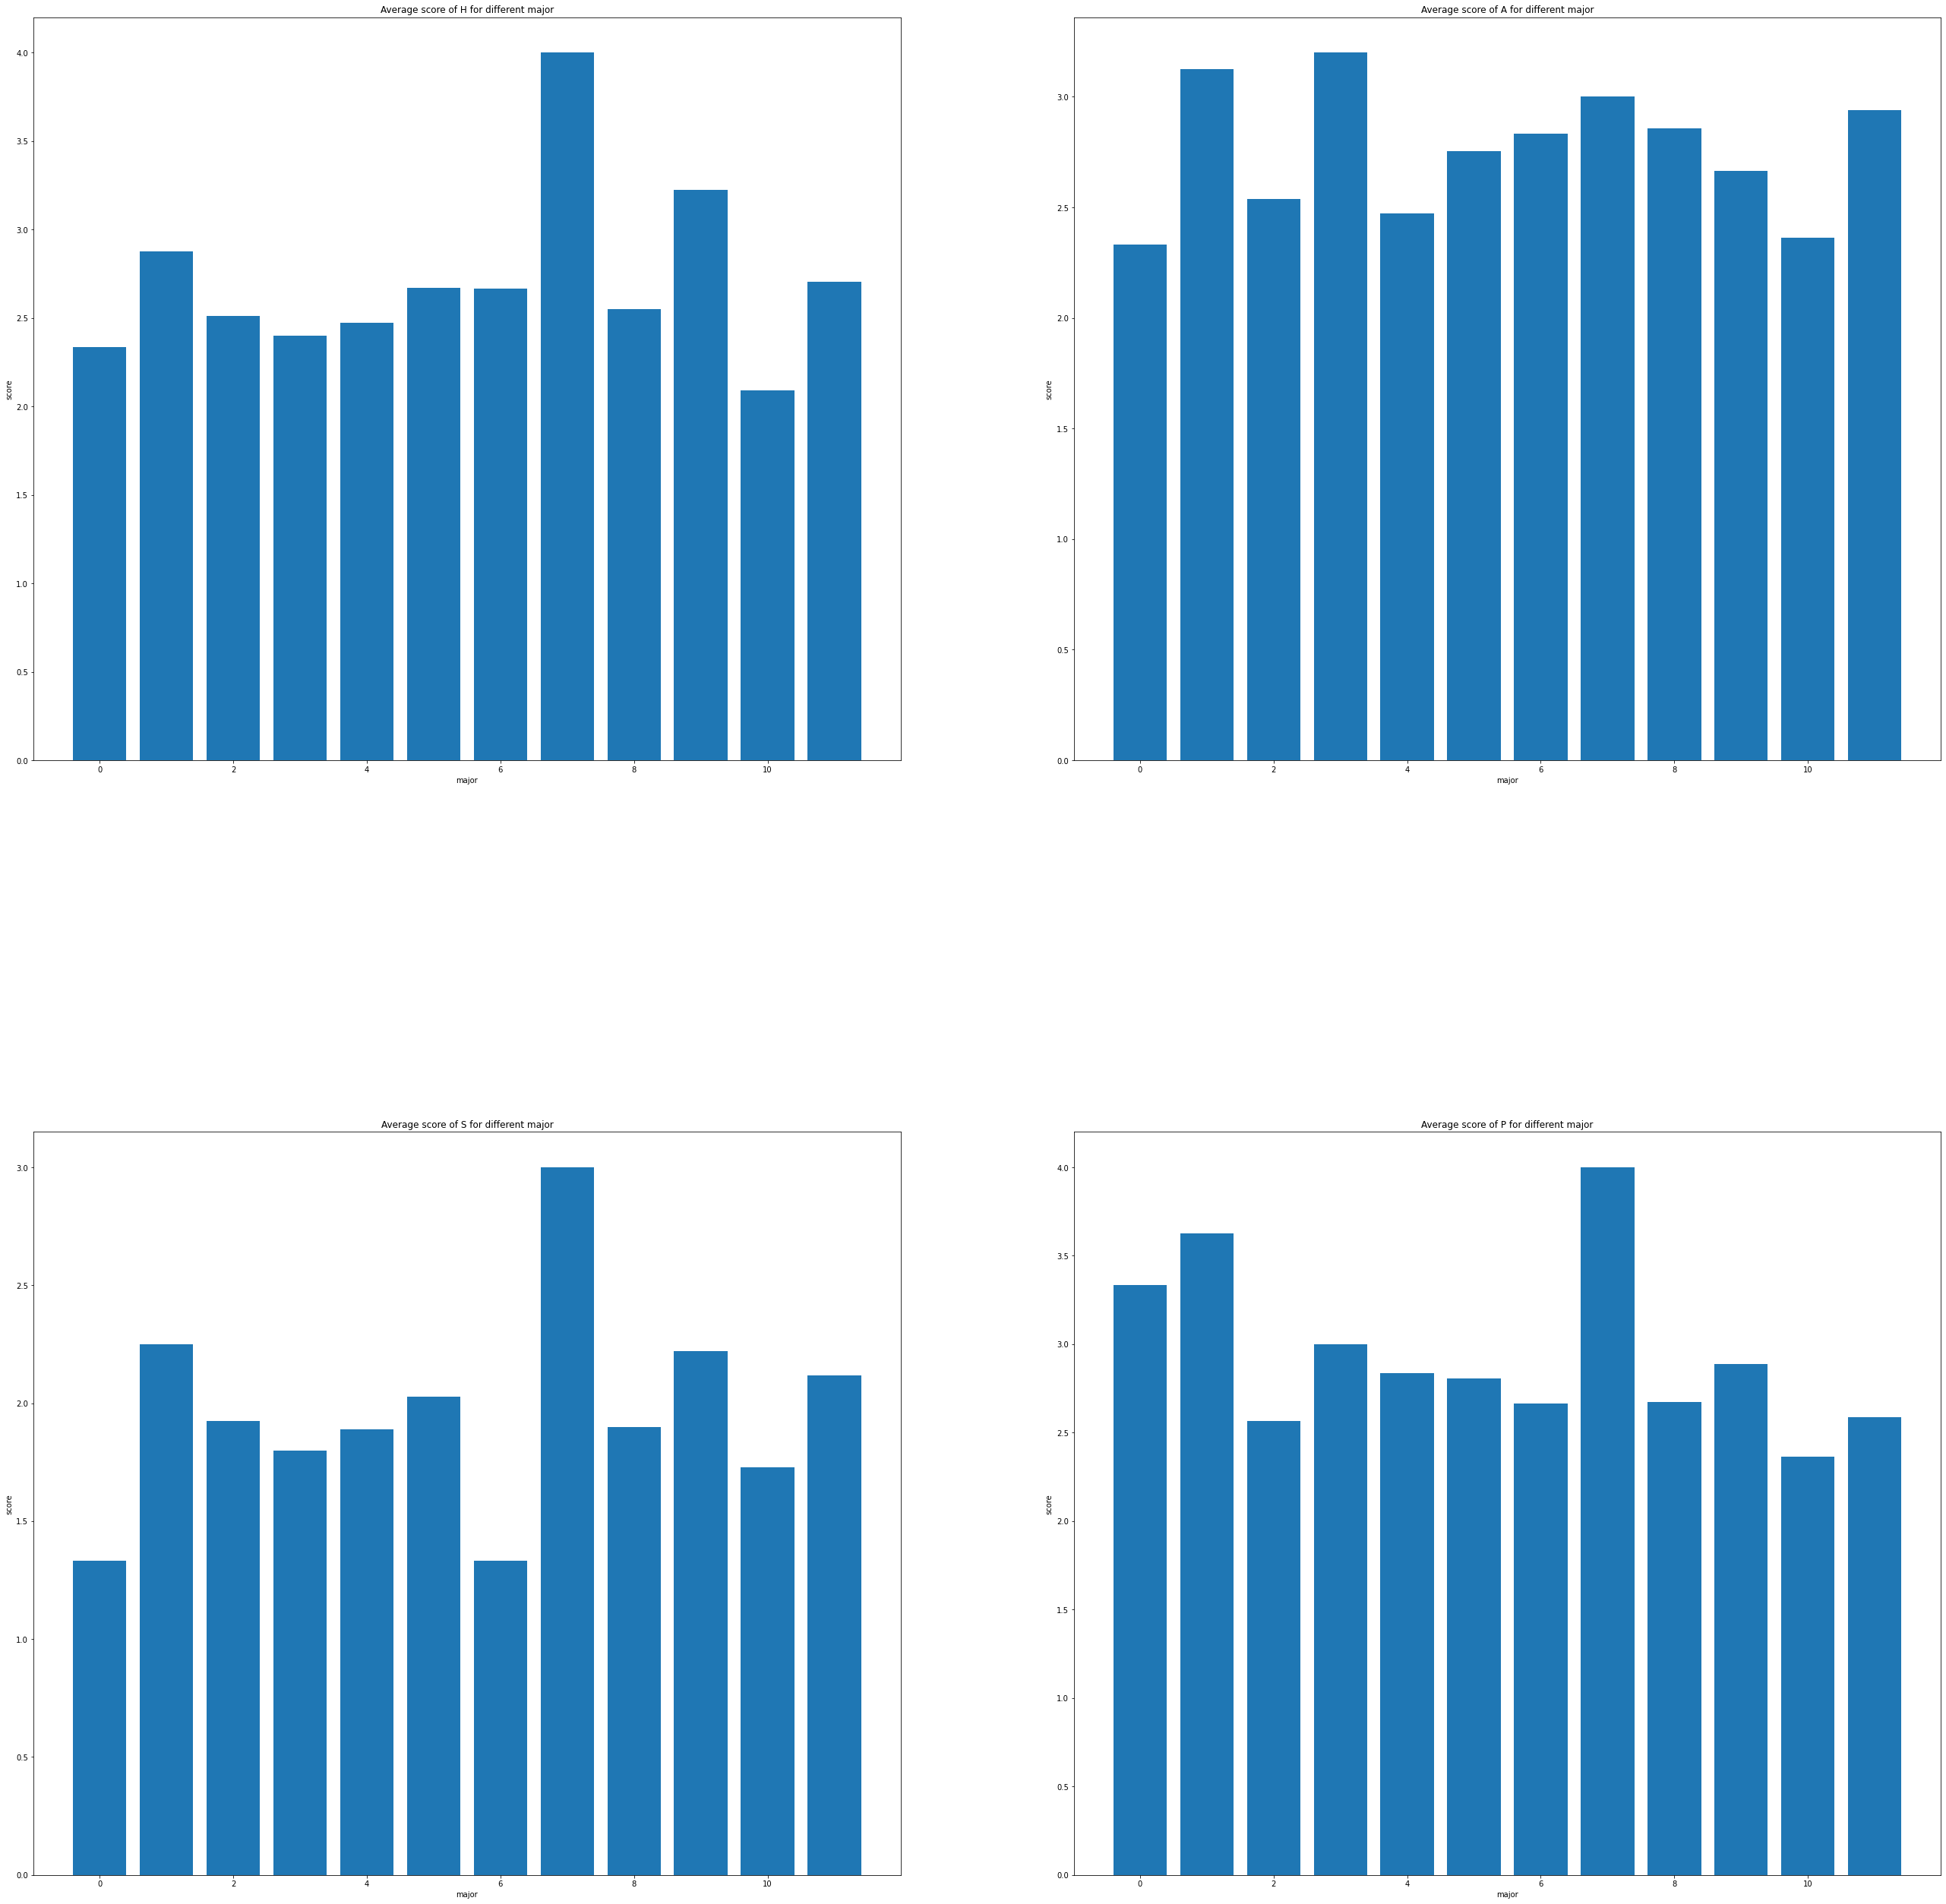

In [68]:
index_maj = range(len(V2_1['major'].unique()))

fig = plt.figure(figsize=(45,45))
fig.subplots_adjust(hspace = 0.5)

plt.subplot(221)
plt.bar(index_maj, V2_1.groupby('major')['H'].mean())
plt.xlabel('major')
plt.ylabel('score')
plt.title('Average score of H for different major')

plt.subplot(222)
plt.bar(index_maj, V2_1.groupby('major')['A'].mean())
plt.xlabel('major')
plt.ylabel('score')
plt.title('Average score of A for different major')

plt.subplot(223)
plt.bar(index_maj, V2_1.groupby('major')['S'].mean())
plt.xlabel('major')
plt.ylabel('score')
plt.title('Average score of S for different major')

plt.subplot(224)
plt.bar(index_maj, V2_1.groupby('major')['P'].mean())
plt.xlabel('major')
plt.ylabel('score')
plt.title('Average score of P for different major')
plt.show()

## Data Visualization V2_2

* V2_2 In order to determine which feature has the greatest impact

In [69]:
V2_2 = V2_df.copy()

In [70]:
col_index_2 = [1] + [i for i in range(11, 43)] + [45]
V2_2 = V2_2.iloc[:, col_index_2]

In [71]:
V2_2.head(3)

,gender,A1,A2,A3,A4,A5,A6,AS,S1,S2,...,H3,H4,H5,H6,HS,A,P,H,S,comment
0,Male,4.0,3.0,2.0,3.0,4.0,3.0,"Attending class regularly, Doing homework regu...",2.0,2.0,...,4.0,4.0,4.0,3.0,"Learning something new, Finishing to a lesson ...",4,1,3,1,sports
1,Male,2.0,4.0,2.0,3.0,5.0,3.0,"Using on-line resources (videos, course, blogs...",2.0,5.0,...,3.0,4.0,5.0,4.0,"Learning something new, Chatting, video-confer...",4,2,3,2,Visiting my companion
2,Male,NaN,2.0,2.0,1.0,NaN,3.0,"Doing homework regularly, Using on-line resour...",3.0,2.0,...,1.0,2.0,3.0,1.0,"Learning something new, Finishing to a lesson ...",2,1,2,1,working in the office


In [72]:
print('Most important features according to the correlation with HASP')
most_important_features = V2_2.corr()['H'].sort_values(ascending=False)[:10]
print (V2_2.corr()['H'].sort_values(ascending=False)[:10], '\n')

most_important_features = V2_2.corr()['A'].sort_values(ascending=False)[:10]
print (V2_2.corr()['A'].sort_values(ascending=False)[:10], '\n')

most_important_features = V2_2.corr()['S'].sort_values(ascending=False)[:10]
print (V2_2.corr()['S'].sort_values(ascending=False)[:10], '\n')

most_important_features = V2_2.corr()['P'].sort_values(ascending=False)[:10]
print (V2_2.corr()['P'].sort_values(ascending=False)[:10], '\n')

Most important features according to the correlation with HASP
H     1.000000
H2    0.653654
H5    0.588030
H3    0.563962
H1    0.522350
H4    0.515724
H6    0.511096
S     0.487594
P2    0.413431
A2    0.381659
Name: H, dtype: float64 

A     1.000000
A5    0.688643
A2    0.547462
H6    0.513071
A3    0.456889
H4    0.398303
H5    0.339698
S6    0.324607
H     0.313355
H1    0.297507
Name: A, dtype: float64 

S     1.000000
S4    0.505139
H     0.487594
H3    0.476556
S5    0.450887
H2    0.374210
H6    0.352029
S6    0.323719
H5    0.302537
S2    0.295735
Name: S, dtype: float64 

P     1.000000
P4    0.830763
P6    0.356950
P2    0.347671
P3    0.312609
H     0.305082
H6    0.303613
H4    0.301674
A2    0.286211
H1    0.267528
Name: P, dtype: float64 



## V2_3

* The impact of comments

In [73]:
V2_3 = V2_df['comment'].copy()

In [74]:
V2_3.head()

0                                               sports
1                                Visiting my companion
2                                working in the office
3    le fait d’être priver d'une partie de ma famille 
4                                               Travel
Name: comment, dtype: object

In [75]:
V2_3.to_csv('comments.txt', sep='\t', index=False)

In [76]:
text_list = open('comments.txt')

In [77]:
import jieba
from sklearn.feature_extraction.text import  TfidfVectorizer
from sklearn.cluster import KMeans

In [78]:
def jieba_tokenize(text):
    return jieba.lcut(text)

In [79]:
tfidf_vectorizer = TfidfVectorizer(tokenizer = jieba_tokenize, lowercase = False)
tfidf_matrix = tfidf_vectorizer.fit_transform(text_list)


Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/wq/n4n2fmjn00b2t0lml1bvc3l80000gn/T/jieba.cache
Loading model cost 0.790 seconds.
Prefix dict has been built succesfully.


In [80]:
for i in range(5,20):  
    km_cluster = KMeans(n_clusters=i, max_iter=300, n_init=40, init='k-means++',n_jobs=-1)
    result = km_cluster.fit_predict(tfidf_matrix)
    # For each point, the sum of the distance to the center of the cluster
    print(km_cluster.inertia_)

528.5844801321533
518.3918101497543
507.9041352594884
503.18899211107134
491.5529082291052
490.37145184354625
486.0213323767114
480.9878833403327
472.8391576078303
470.9361350396249
466.3041886104848
462.8286729497954
459.73505779382964
458.22831820098037
454.9274685105387


In [81]:
num_clusters = 18
km_cluster = KMeans(n_clusters = num_clusters, max_iter = 300, n_init = 40, init = 'k-means++',n_jobs = -1)
result = km_cluster.fit_predict(tfidf_matrix)
print("Predicting result: \n", result)

Predicting result: 
 [13 13 16 16 13  1  6  7  7 15 16 13  7 13 13  7  8 13  7 16 16 16  4  3
 10 10 15  7 13 16 13  3 13  7 16  0  6 14 16  0  7  6  6 16 14  7 16  2
 16 13 16  0  7  6 13 16 16  7 13 12 11 13  0  6  7  7  3 12  7 15 13 13
 13  2  7  7 16 16 13 10 16 13 16 10 16 11 16  0  7  7  3 16 16  0 13  3
 11 13 13 12  6 16 10 16 16 16  4 13 14 10 13 15 13  6  1  7 15 14 13  0
  6  4  7  6  2  6 13 16  1 13 11  6 16 16  7  0  2 10 16 16 16 10  0  2
  7 13 13 16  7  8 16 16 11 16  7 16  3 12 11  7 13  7  7 16 16 16 16 16
 16 13 15 13  7 16 16 15  7 13  2  7  2  7 13  0  6  0 13 13 16 13  3  7
 16 14 10  3  7 13 16 10  7  7  0 14 16 16  2  1 13 13 13  7  3 13 16 13
 11 16 12  1 13 10  8  2 13 16 16 13 16 12 13  9 16 13  0 13 16 16  1 12
 12 16 13 16 10 13 16 13 13 12 16 15  7 13 16  7 10 13 13  7 11  0 13  7
 13  7 14 16 10  5  2  7 14 13 13 16 13 11 16 13 13  9 14 10  3  2  3 16
  0  7  9 16 13  9 16 16 15  7 10  8  7 10  9 16 13  5 10  2 13  7  7 13
 13 15 13  7  6  8 14 13 16  3

In [82]:
import numpy as np
file = open('comments.txt','r', encoding='utf-8')
data = file.readlines()
index = result.argsort()
# print(index)
for i in range(len(index)):
    print(result[index[i]], data[index[i]])

0 Nature, the sky, the sun 

0 Cinemas, museums, cultural activities

0 Physical interactions, seeing friends

0 Going to the gym

0 Social interaction, go to the cinema, restaurant, meet new people

0 Access restaurants, cinema

0 Nature, the sky, the sun 

0 Social interaction, climbing gyms, nature

0 the sunny weather

0 Amis, famille, sport

0 Go out for lunch, activities..

0 Familly, money, paid jobs

0 friends, activities outside

0 Going to the movies

0 Social interaction, climbing gyms, nature

0 Cultural life: théâtres, muséums, cinema

0 Facilities at the office (printer, screen, good chair, desk large enough...)

0 Attending courses together, collective sport

0 "physical interactions, 

0 faire du sport en exterieur

0 People, interactions and sun

0 University and sun

0 the sun

0 Restaurants, cinema, swimming pools...

0 sortir, voir des gens, sa copine

0 Going outside, using the public transports, go to the sport clubs

0 Collective sport and familly

0 Parties and 


16 My usual sources of income (tutoring for instance and internship)

16 Human contact, especially with my family.

16 Distractions from my depression

16 Periodic interactions with people in class

16 Les balades en forêt et la liberté 

16 Spending time with friends, doing something together.

16 Hug from a friend.

16 Go shopping together with my family

16 me balader, aller à l'extérieur 

16 Mes amis et mon appartement

16 a place to study

16 Fresh air and long walks

16 Nothing I loved quarantine 

16 Meeting my lover

17 Girlfriend

17 Girlfriend

17 Girlfriend

17 Girlfriend



In [83]:
l = []
for i in range(18):
    l.append([])

* Find the highest frequency

In [84]:
for i in range(len(index)):
    for c in range(18):
        if result[index[i]] == c:
            l[c].append(data[index[i]])

In [85]:
for i in range(18):
    print(max(l[i], key=l[i].count))

Nature, the sky, the sun 

Being able to meet up with my friends and partner

Social interactions

My friends

Freedom

people

Friends

Going out, meeting friends and having nice topics to talk about, not always sad and stressful topics

Sport

Friends , student life 

Going out with friends

Seeing friends

social interaction

Family 

Seeing my boyfriend

friends

Be close to people

Girlfriend



## V2_4

In [86]:
V2_4 = V2_df.copy()

In [87]:
col_index_4 = [i for i in range(11, 17)] + [i for i in range(18, 24)] \
+ [i for i in range(25, 31)] + [i for i in range(32, 38)] + [i for i in range(39, 43)]
V2_4 = V2_4.iloc[:, col_index_4]


In [88]:
V2_4.head()

,A1,A2,A3,A4,A5,A6,S1,S2,S3,S4,...,H1,H2,H3,H4,H5,H6,A,P,H,S
0,4.0,3.0,2.0,3.0,4.0,3.0,2.0,2.0,3.0,2.0,...,1.0,2.0,4.0,4.0,4.0,3.0,4,1,3,1
1,2.0,4.0,2.0,3.0,5.0,3.0,2.0,5.0,4.0,3.0,...,4.0,3.0,3.0,4.0,5.0,4.0,4,2,3,2
2,NaN,2.0,2.0,1.0,NaN,3.0,3.0,2.0,2.0,2.0,...,2.0,2.0,1.0,2.0,3.0,1.0,2,1,2,1
3,4.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,4.0,4.0,3,2,4,3
4,3.0,3.0,5.0,2.0,4.0,3.0,2.0,2.0,1.0,2.0,...,3.0,2.0,3.0,3.0,3.0,4.0,4,3,3,2


In [89]:
# Fill with neutral, not mean
V2_4 = V2_4.fillna(3.0)

In [90]:
V2_4.iloc[:,0:-4]

,A1,A2,A3,A4,A5,A6,S1,S2,S3,S4,...,P3,P4,P5,P6,H1,H2,H3,H4,H5,H6
0,4.0,3.0,2.0,3.0,4.0,3.0,2.0,2.0,3.0,2.0,...,2,1.0,3.0,3.0,1.0,2.0,4.0,4.0,4.0,3.0
1,2.0,4.0,2.0,3.0,5.0,3.0,2.0,5.0,4.0,3.0,...,1,3.0,3.0,1.0,4.0,3.0,3.0,4.0,5.0,4.0
2,3.0,2.0,2.0,1.0,3.0,3.0,3.0,2.0,2.0,2.0,...,1,1.0,3.0,2.0,2.0,2.0,1.0,2.0,3.0,1.0
3,4.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,1,1.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0
4,3.0,3.0,5.0,2.0,4.0,3.0,2.0,2.0,1.0,2.0,...,4,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,4.0
5,3.0,1.0,1.0,3.0,3.0,2.0,2.0,4.0,1.0,1.0,...,2,3.0,5.0,3.0,3.0,2.0,1.0,3.0,3.0,1.0
6,3.0,2.0,3.0,4.0,3.0,2.0,3.0,3.0,4.0,3.0,...,2,2.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,2.0
7,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0
8,2.0,2.0,2.0,2.0,1.0,4.0,1.0,1.0,1.0,1.0,...,3,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9,1.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,...,5,3.0,3.0,4.0,1.0,3.0,3.0,3.0,2.0,2.0


In [91]:
# Because hasp is not independent of each other, four models need to be created
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1 = train_test_split(V2_4.iloc[:,0:-4],V2_4['H'],test_size=0.2,random_state=1)
X_train2,X_test2,y_train2,y_test2 = train_test_split(V2_4.iloc[:,0:-4],V2_4['A'],test_size=0.2,random_state=2)
X_train3,X_test3,y_train3,y_test3 = train_test_split(V2_4.iloc[:,0:-4],V2_4['S'],test_size=0.2,random_state=3)
X_train4,X_test4,y_train4,y_test4 = train_test_split(V2_4.iloc[:,0:-4],V2_4['P'],test_size=0.2,random_state=4)


model1 = LinearRegression()
model1.fit(X_train1, y_train1)
print(model1.score(X_test1,y_test1))

model2 = LinearRegression()
model2.fit(X_train2, y_train2)
print(model2.score(X_test2,y_test2))

model3 = LinearRegression()
model3.fit(X_train3, y_train3)
print(model3.score(X_test3,y_test3))

model4 = LinearRegression()
model4.fit(X_train4, y_train4)
print(model4.score(X_test4,y_test4))


0.5514327333178879
0.5283066015163299
0.3054060329662849
0.6708682565511788


In [92]:
LI = V2_4.iloc[0:1, 0:-4]

In [93]:
print(model1.predict(LI))
print(model2.predict(LI))
print(model3.predict(LI))
print(model4.predict(LI))

[2.82546718]
[3.61389529]
[2.14538993]
[1.55186154]


* Radar plot

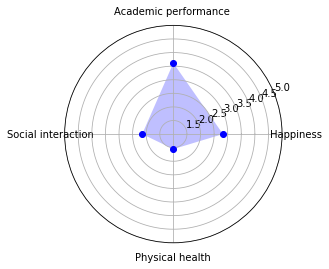

In [94]:
import numpy as np
from matplotlib import pyplot as plt
label = np.array(['Happiness','Academic performance ','Social interaction','Physical health'])
data = np.array([2.82546718, 3.61389529, 2.14538993, 1.55186154])
#
angles = np.linspace(0,2*np.pi,len(label),endpoint=False)
fig = plt.figure()
ax = fig.add_subplot(111,polar=True)
#
ax.plot(angles,data,'bo',linewidth=2)
ax.fill(angles,data,facecolor = 'b', alpha=0.25)
ax.set_thetagrids(angles*180/np.pi,label)
ax.set_rlim(1,5)
ax.grid(True)
plt.show()

## V2_5

In [95]:
V2_5 = V2_df.iloc[:,1:-1].copy()
V2_5 = V2_5.fillna(3.0)


In [96]:
V2_5.head()

,gender,location,university,year of study,year of program,major,origin,sheltering place,stringency,dramatic change,...,H4,H5,H6,HS,A,P,H,S,experience quarantine,effect quarantine
0,Male,France,Saclay,2,"Yes, I am in the last year of my program","Computer Science, computer engineering",Same country as university,Primary residence or your family place (if dif...,5,"YES, but due to other reasons",...,4.0,4.0,3.0,"Learning something new, Finishing to a lesson ...",4,1,3,1,2,5
1,Male,France,Saclay,2,"No, I am in the middle of the program","Computer Science, computer engineering",Same country as university,University lodging or temporary lodging near t...,5,"YES, due to COVID-19",...,4.0,5.0,4.0,"Learning something new, Chatting, video-confer...",4,2,3,2,4,5
2,Male,France,Saclay,3,"Yes, I am in the last year of my program","Computer Science, computer engineering",Other,Primary residence or your family place (if dif...,4,NO,...,2.0,3.0,1.0,"Learning something new, Finishing to a lesson ...",2,1,2,1,2,5
3,Female,France,Saclay,2,"No, I am in the middle of the program","Computer Science, computer engineering",Other,Primary residence or your family place (if dif...,5,Prefer not to say,...,3.0,4.0,4.0,"Finishing to a lesson or do homework, Watching...",3,2,4,3,4,5
4,Female,France,Saclay,2,"No, I am in the middle of the program",Other sciences,Same country as university,Primary residence or your family place (if dif...,4,NO,...,3.0,3.0,4.0,"Learning something new, Physically exercising,...",4,3,3,2,4,5


In [97]:
col_index_5 = [i for i in range(0, 16)] + [i for i in range(17, 23)] \
+ [i for i in range(24, 30)] + [i for i in range(31, 37)] + [i for i in range(38, 44)]
V2_5_train = V2_5.iloc[:, col_index_5]

In [98]:
from sklearn.ensemble import RandomForestClassifier
X_train1,X_test1,y_train1,y_test1 = train_test_split(pd.get_dummies(V2_5_train),V2_5['HS'],test_size=0.2,random_state=1)
X_train2,X_test2,y_train2,y_test2 = train_test_split(pd.get_dummies(V2_5_train),V2_5['AS'],test_size=0.2,random_state=2)
X_train3,X_test3,y_train3,y_test3 = train_test_split(pd.get_dummies(V2_5_train),V2_5['SS'],test_size=0.2,random_state=3)
X_train4,X_test4,y_train4,y_test4 = train_test_split(pd.get_dummies(V2_5_train),V2_5['PS'],test_size=0.2,random_state=4)



In [99]:

model1 = RandomForestClassifier()
model1.fit(X_train1, y_train1)
predict_results1 = model1.predict(X_test1)

model2 = RandomForestClassifier()
model2.fit(X_train2, y_train2)
predict_results2 = model2.predict(X_test2)

model3 = RandomForestClassifier()
model3.fit(X_train3, y_train3)
predict_results3 = model3.predict(X_test3)

model4 = RandomForestClassifier()
model4.fit(X_train4, y_train4)
predict_results4 = model4.predict(X_test4)


* Some practical application results show that when the cardinality is very large, each level is directly encoded as a number and then used as a numerical feature. So we could also not use onehot but change all the values into float.
